### Loading Packages and Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
ls /share/costeffectiveness/results/vivarium_nih_us_cvd/model_1/nih_us_cvd/alabama/2022_07_29_16_19_31/

__pycache__/   keyspace.yaml             output.hdf
branches.yaml  logs/                     requirements.txt
count_data/    model_specification.yaml  settings.py


In [3]:
ls /share/costeffectiveness/results/vivarium_nih_us_cvd/model_1/nih_us_cvd/alabama/2022_07_29_16_19_31/count_data/

deaths.csv      population.hdf         transition_count.csv  ylds.hdf
deaths.hdf      state_person_time.csv  transition_count.hdf  ylls.csv
population.csv  state_person_time.hdf  ylds.csv              ylls.hdf


In [4]:
sim_results_dir = '/share/costeffectiveness/results/vivarium_nih_us_cvd/model_1/nih_us_cvd/alabama/2022_07_29_16_19_31/count_data/'

### Exploring Data

In [5]:
deaths = pd.read_csv(sim_results_dir + 'deaths.csv')

In [6]:
deaths.head()

Unnamed: 0     sex  year                  cause measure  input_draw  \
0           0  female  2023  acute_ischemic_stroke  deaths          29   
1           1  female  2023  acute_ischemic_stroke  deaths          29   
2           2  female  2023  acute_ischemic_stroke  deaths          29   
3           3  female  2023  acute_ischemic_stroke  deaths          29   
4           4  female  2023  acute_ischemic_stroke  deaths          29   

   scenario       age  value  
0  baseline  25_to_29      0  
1  baseline  30_to_34      0  
2  baseline  35_to_39      0  
3  baseline  40_to_44      0  
4  baseline  45_to_49      0

In [7]:
deaths.year.unique()

array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033,
       2034, 2035, 2036, 2037, 2038, 2039, 2040])

In [8]:
deaths.cause.unique()

array(['acute_ischemic_stroke', 'chronic_ischemic_stroke', 'other_causes'],
      dtype=object)

In [9]:
deaths.sex.unique()

array(['female', 'male'], dtype=object)

In [10]:
deaths.input_draw.nunique()

10

In [11]:
pop = pd.read_csv(sim_results_dir + 'population.csv')

In [12]:
pop.head()

Unnamed: 0           measure  input_draw  scenario   value
0           0  total_population          29  baseline  750000
1           1  total_population         232  baseline  750000
2           2  total_population         357  baseline  750000
3           3  total_population         394  baseline  750000
4           4  total_population         602  baseline  750000

In [13]:
pop.loc[pop.measure=="total_population_untracked"].value.sum()

122

In [14]:
pop.measure.unique()

array(['total_population', 'total_population_dead',
       'total_population_living', 'total_population_tracked',
       'total_population_untracked'], dtype=object)

In [15]:
tran = pd.read_csv(sim_results_dir + 'transition_count.csv')

In [16]:
tran.head()

Unnamed: 0     sex  year           measure  input_draw  scenario       age  \
0           0  female  2023  transition_count          29  baseline  25_to_29   
1           1  female  2023  transition_count          29  baseline  30_to_34   
2           2  female  2023  transition_count          29  baseline  35_to_39   
3           3  female  2023  transition_count          29  baseline  40_to_44   
4           4  female  2023  transition_count          29  baseline  45_to_49   

                                         transition          disease  value  
0  acute_ischemic_stroke_to_chronic_ischemic_stroke  ischemic_stroke      5  
1  acute_ischemic_stroke_to_chronic_ischemic_stroke  ischemic_stroke      3  
2  acute_ischemic_stroke_to_chronic_ischemic_stroke  ischemic_stroke      7  
3  acute_ischemic_stroke_to_chronic_ischemic_stroke  ischemic_stroke     11  
4  acute_ischemic_stroke_to_chronic_ischemic_stroke  ischemic_stroke     23

In [17]:
tran.transition.unique()

array(['acute_ischemic_stroke_to_chronic_ischemic_stroke',
       'chronic_ischemic_stroke_to_acute_ischemic_stroke',
       'susceptible_to_ischemic_stroke_to_acute_ischemic_stroke'],
      dtype=object)

### Total DALYs by Year

In [18]:
yll = pd.read_csv(sim_results_dir + 'ylls.csv')
yll = yll.rename(columns = {'value':'yll'})
yld = pd.read_csv(sim_results_dir + 'ylds.csv')
yld = yld.rename(columns = {'value':'yld'})
daly = pd.concat([yll, yld.yld], axis=1)
daly['daly'] = daly['yll'] + daly['yld'] 

daly.head()

Unnamed: 0     sex  year                  cause measure  input_draw  \
0           0  female  2023  acute_ischemic_stroke    ylls          29   
1           1  female  2023  acute_ischemic_stroke    ylls          29   
2           2  female  2023  acute_ischemic_stroke    ylls          29   
3           3  female  2023  acute_ischemic_stroke    ylls          29   
4           4  female  2023  acute_ischemic_stroke    ylls          29   

   scenario       age  yll       yld      daly  
0  baseline  25_to_29  0.0  0.000231  0.000231  
1  baseline  30_to_34  0.0  0.000175  0.000175  
2  baseline  35_to_39  0.0  0.000417  0.000417  
3  baseline  40_to_44  0.0  0.000673  0.000673  
4  baseline  45_to_49  0.0  0.001373  0.001373

In [19]:
daly_sum = (daly
                .groupby(['year'])
                .daly.describe(percentiles=[.025, .975])
                .filter(['mean', '2.5%', '97.5%'])
                .reset_index())

daly_sum.head()

year         mean      2.5%         97.5%
0  2023  2187.555261  0.000080  12370.058865
1  2024  2046.694564  0.000104  11659.195033
2  2025  2068.474769  0.000106  11795.120058
3  2026  2086.740051  0.000101  11768.547232
4  2027  2101.217945  0.000090  12048.847913

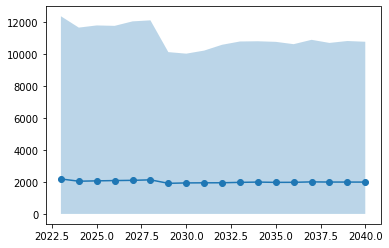

In [20]:
plt.plot(daly_sum['year'], daly_sum['mean'], marker = 'o')
plt.fill_between(daly_sum['year'], daly_sum['2.5%'], daly_sum['97.5%'], alpha = 0.3)

### All Cause Mortality Graphs

In [21]:
result_summary = (deaths
                      .groupby(['age', 'sex', 'year'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary.head()

age     sex  year      mean  2.5%   97.5%
0  25_to_29  female  2023  9.866667   0.0  36.100
1  25_to_29  female  2024  7.866667   0.0  28.825
2  25_to_29  female  2025  8.566667   0.0  29.550
3  25_to_29  female  2026  8.100000   0.0  32.100
4  25_to_29  female  2027  8.666667   0.0  30.000

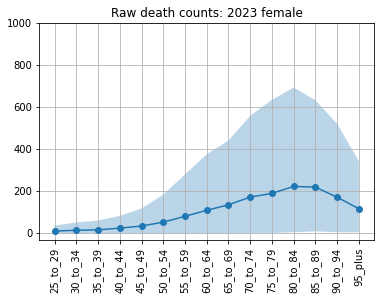

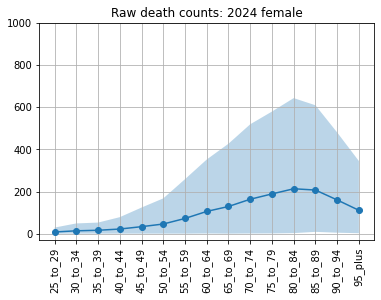

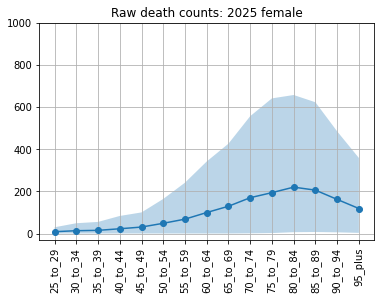

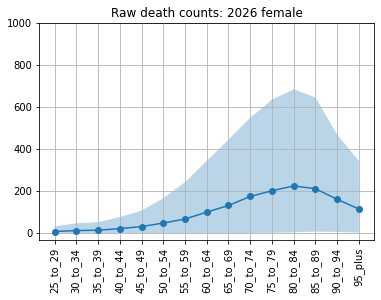

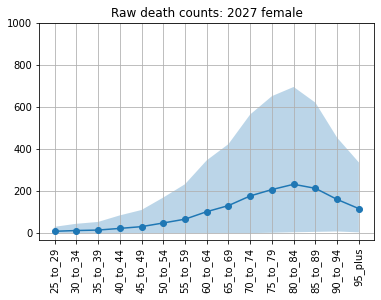

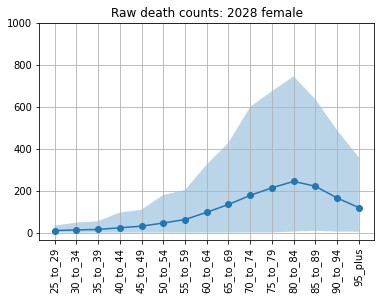

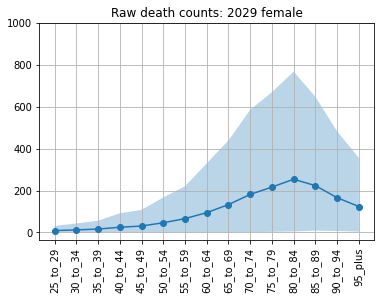

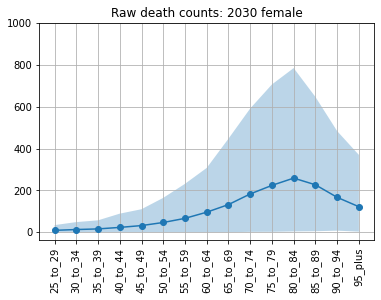

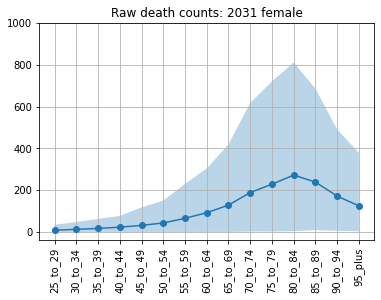

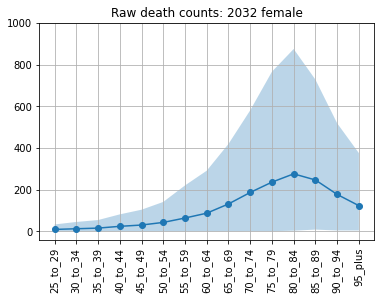

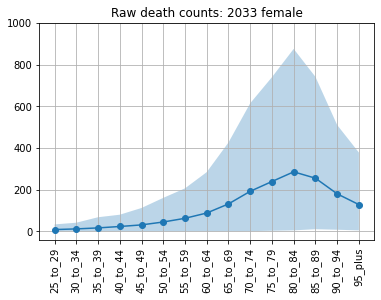

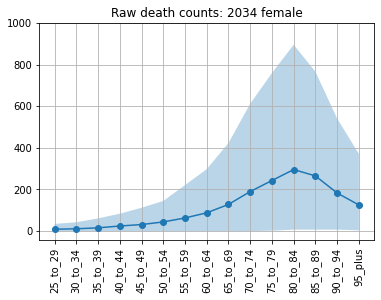

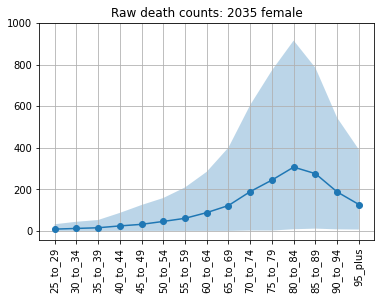

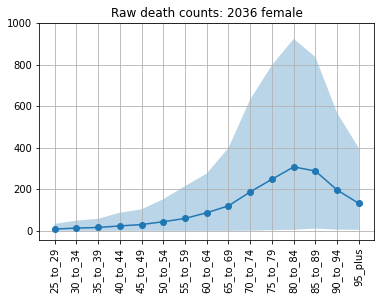

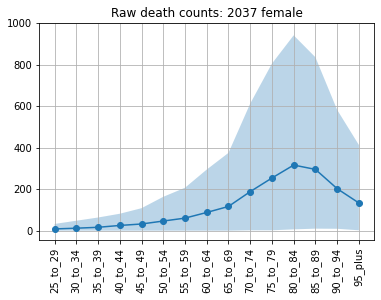

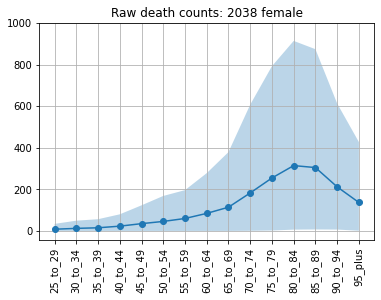

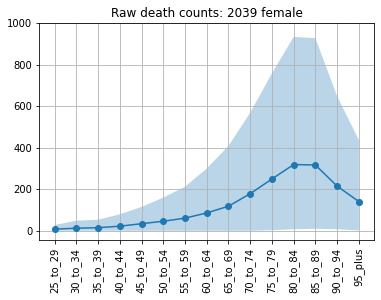

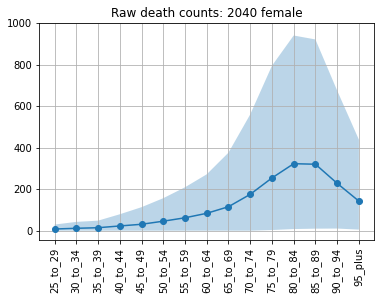

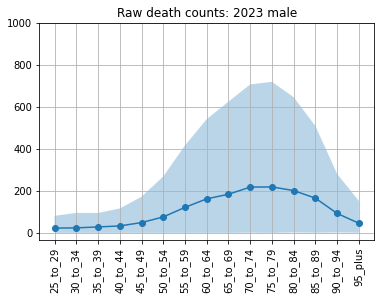

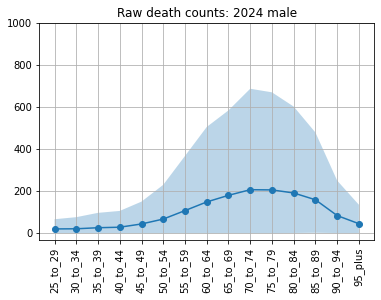

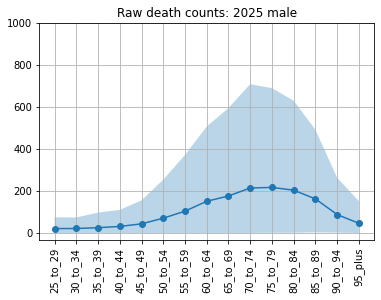

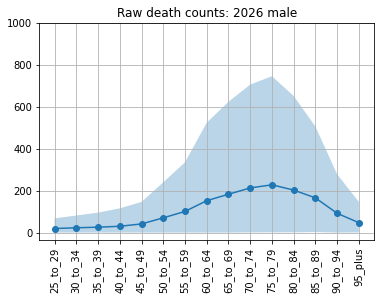

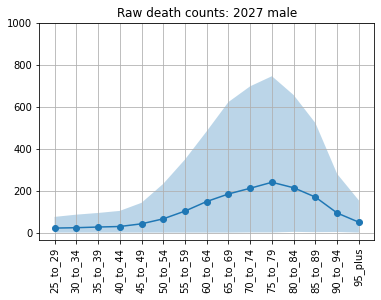

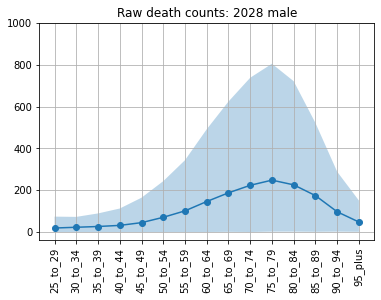

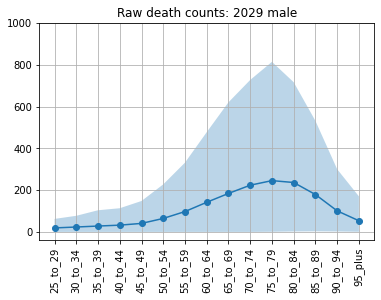

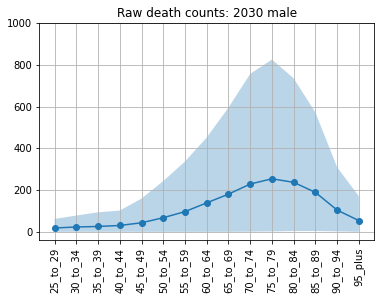

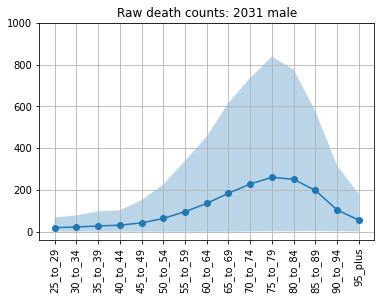

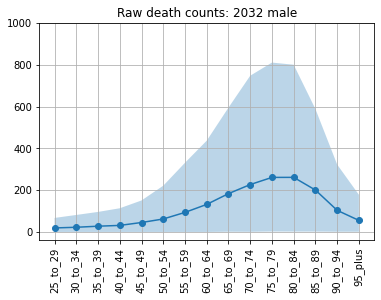

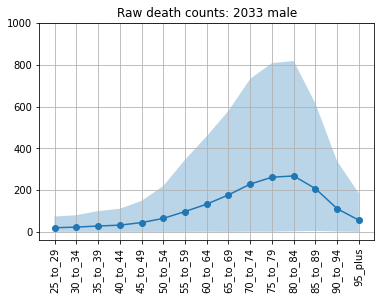

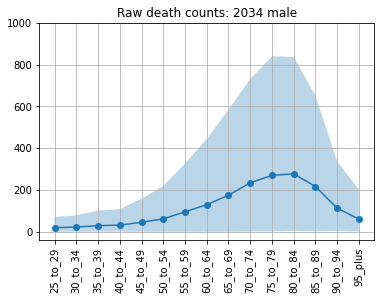

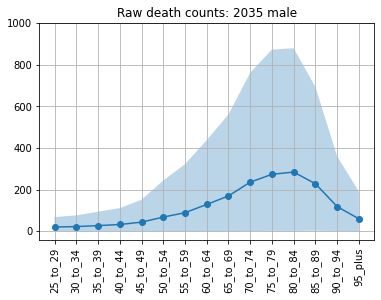

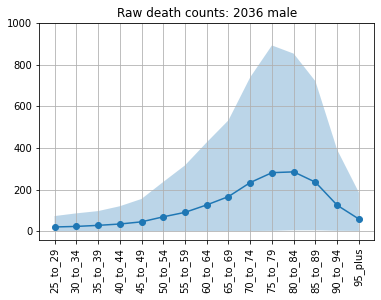

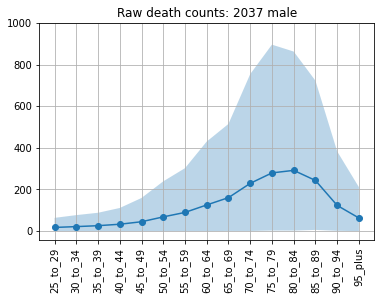

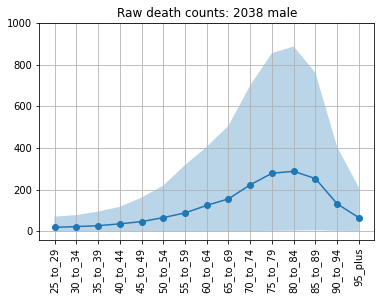

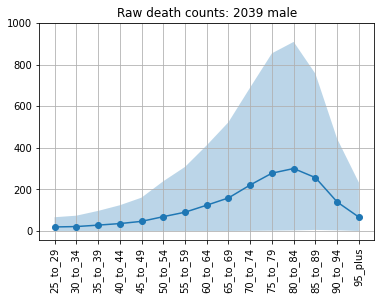

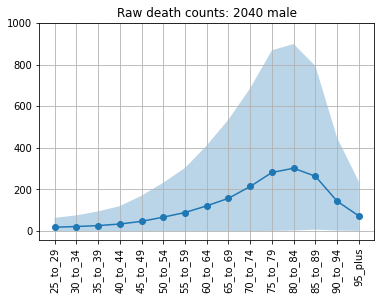

In [22]:
from matplotlib.backends.backend_pdf import PdfPages # PDF package

# this will output a PDF with a new plot on each page
# will be saved to the current working directory with the specified filename
with PdfPages('model1vv_raw_mortality_counts.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for year in result_summary.year.unique():
            plt.figure() # this makes each new iteration of this code show up on a new figure
                         # otherwise, they would be overlaid on the same figure and automatically show up as different colors
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year)]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
            plt.title(f'Raw death counts: {year} {sex}') # handy formatting trick... you have to add the "f" before the quotation marks
            plt.xticks(rotation=90) # rotate for legibility of x-tick labels
            plt.ylim(ymax=1000)
            plt.grid()
            pdf.savefig(bbox_inches='tight')
            
            
# NOTE: this actually does appear to be increasing with age overtime
# however, this is probably because we're looking at counts instead of rates and is likely a 
# reflection of a changing age structure rather than issue with the cause model

# let's look again for rates

In [23]:
female_2023 = result_summary.loc[(result_summary['sex']=='female') & (result_summary['year']==2023)]
female_2023.head()

age     sex  year       mean  2.5%    97.5%
0    25_to_29  female  2023   9.866667   0.0   36.100
36   30_to_34  female  2023  13.800000   0.0   50.825
72   35_to_39  female  2023  15.766667   0.0   59.825
108  40_to_44  female  2023  23.800000   0.0   82.025
144  45_to_49  female  2023  33.866667   0.0  117.275

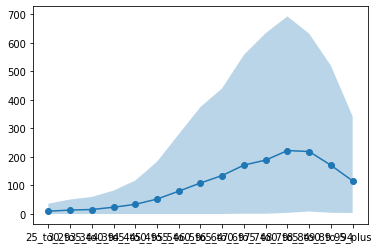

In [24]:
plt.plot(female_2023['age'], female_2023['mean'], marker='o')
plt.fill_between(female_2023['age'], female_2023['2.5%'], female_2023['97.5%'], alpha=.3)

# I'd say for ease of review it's best to have some sort of descriptive title at the top to orient the reviewer!

#### All Cause Mortality Graph with Rate

In [25]:
per_time = pd.read_csv(sim_results_dir + 'state_person_time.csv')
per_time = per_time.rename(columns = {'value':'ptvalue'})
per_time2 = per_time.groupby(['age', 'sex', 'year', 'input_draw']).ptvalue.sum().reset_index()

per_time2.head()

age     sex  year  input_draw       ptvalue
0  25_to_29  female  2023          29  29969.774127
1  25_to_29  female  2023         232  30072.344969
2  25_to_29  female  2023         357  30068.971937
3  25_to_29  female  2023         394  30343.567420
4  25_to_29  female  2023         602  30302.017796

In [26]:
results_rate = deaths.groupby(['age', 'sex', 'year', 'input_draw']).value.sum().reset_index()
print(len(per_time))

16200


In [27]:
results_rate = pd.concat([results_rate, per_time2.ptvalue], axis=1)
results_rate.head()

age     sex  year  input_draw  value       ptvalue
0  25_to_29  female  2023          29     31  29969.774127
1  25_to_29  female  2023         232     34  30072.344969
2  25_to_29  female  2023         357     26  30068.971937
3  25_to_29  female  2023         394     25  30343.567420
4  25_to_29  female  2023         602     25  30302.017796

In [28]:
results_rate['mean_rate'] = results_rate['value'] / results_rate['ptvalue']
results_rate.head()

age     sex  year  input_draw  value       ptvalue  mean_rate
0  25_to_29  female  2023          29     31  29969.774127   0.001034
1  25_to_29  female  2023         232     34  30072.344969   0.001131
2  25_to_29  female  2023         357     26  30068.971937   0.000865
3  25_to_29  female  2023         394     25  30343.567420   0.000824
4  25_to_29  female  2023         602     25  30302.017796   0.000825

In [29]:
# here's an alternative way to do what you did above using pandas indices that I was talking about
# here for reference if you're interested, but also the way you did it definitely works too :) 
groupby_cols = ['age', 'sex', 'year', 'input_draw']
pt = pd.read_csv(sim_results_dir + 'state_person_time.csv').drop(columns='Unnamed: 0')
deaths = pd.read_csv(sim_results_dir + 'deaths.csv').drop(columns='Unnamed: 0')
acmr = deaths.groupby(groupby_cols).sum() / pt.groupby(groupby_cols).sum() # this way we don't have to join dataframes
acmr_summarized = (acmr.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%'])
                  )
                 
acmr_summarized

mean      2.5%     97.5%
age      sex    year                              
25_to_29 female 2023  0.000981  0.000824  0.001259
                2024  0.000848  0.000550  0.001099
                2025  0.000932  0.000752  0.001101
                2026  0.000892  0.000534  0.001246
...                        ...       ...       ...
95_plus  male   2037  0.275615  0.247320  0.309777
                2038  0.275422  0.248321  0.323379
                2039  0.268613  0.233470  0.293403
                2040  0.282955  0.251180  0.319381

[540 rows x 3 columns]

In [30]:
# I also tried acmr_summarized.sex.unique() which also fails 
acmr_summarized.reset_index()
acmr_summarized.head()

mean      2.5%     97.5%
age      sex    year                              
25_to_29 female 2023  0.000981  0.000824  0.001259
                2024  0.000848  0.000550  0.001099
                2025  0.000932  0.000752  0.001101
                2026  0.000892  0.000534  0.001246
                2027  0.000965  0.000590  0.001114

In [31]:
result_summary = (results_rate
                      .groupby(['age', 'sex', 'year'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary.head()

age     sex  year      mean      2.5%     97.5%
0  25_to_29  female  2023  0.000981  0.000824  0.001259
1  25_to_29  female  2024  0.000848  0.000550  0.001099
2  25_to_29  female  2025  0.000932  0.000752  0.001101
3  25_to_29  female  2026  0.000892  0.000534  0.001246
4  25_to_29  female  2027  0.000965  0.000590  0.001114

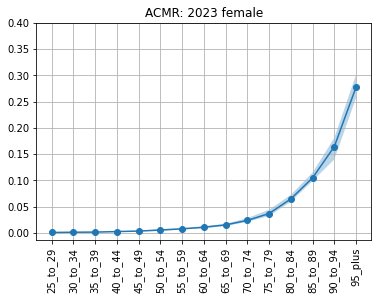

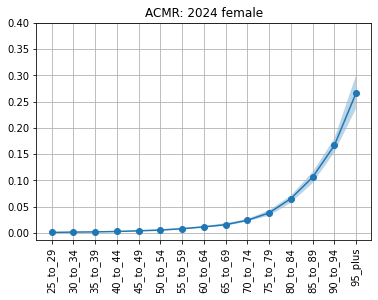

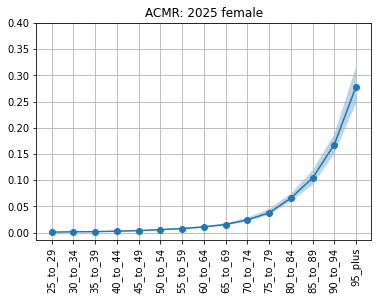

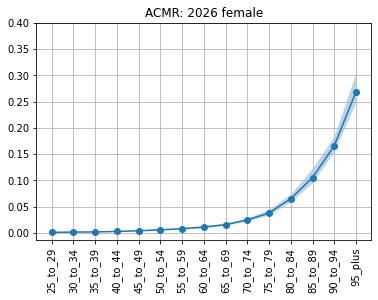

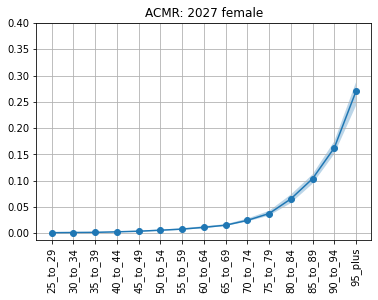

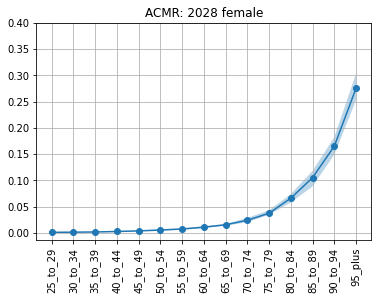

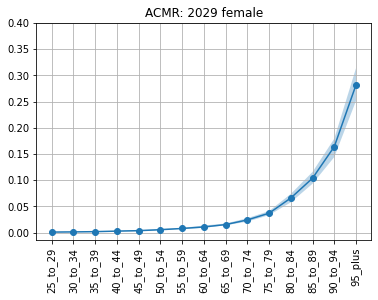

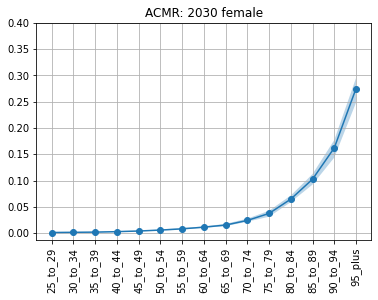

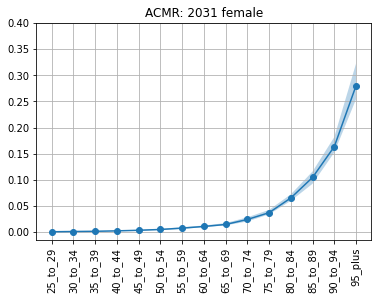

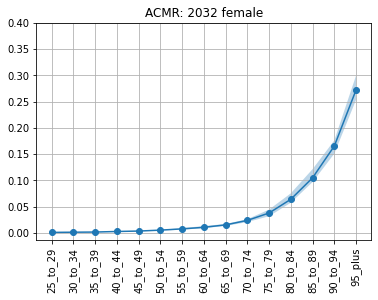

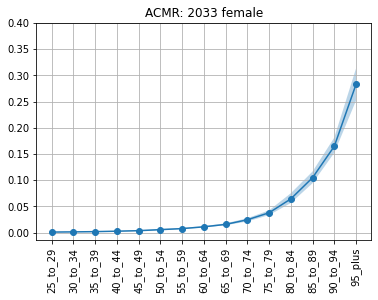

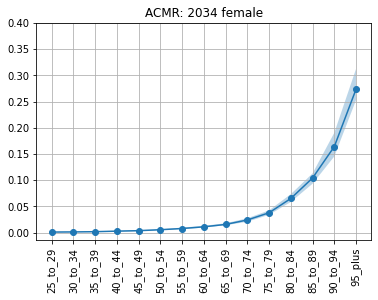

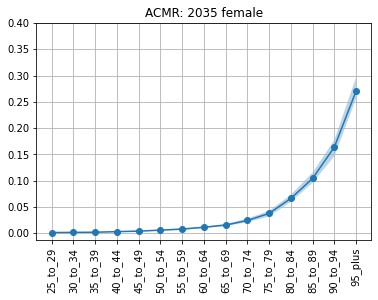

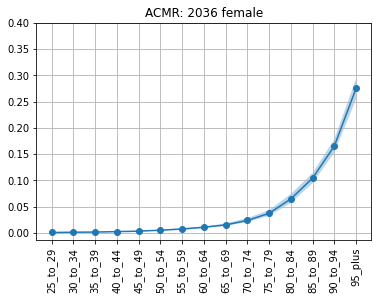

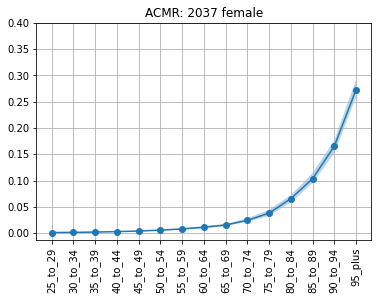

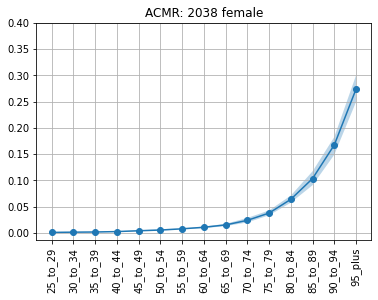

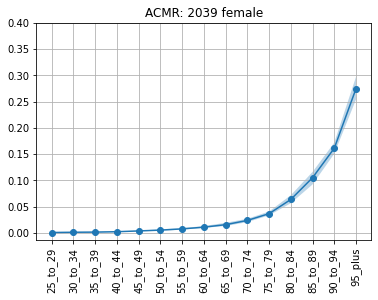

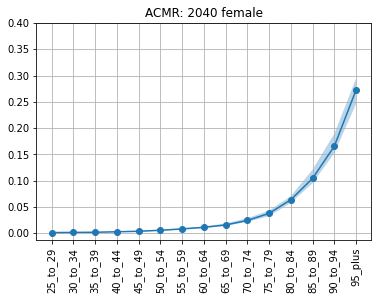

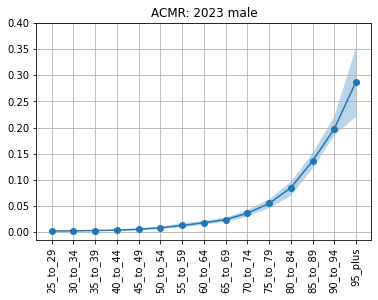

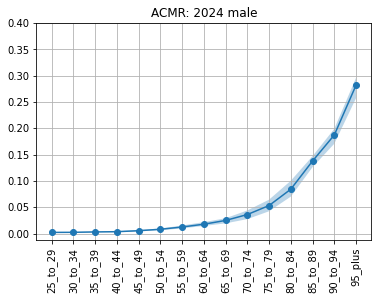

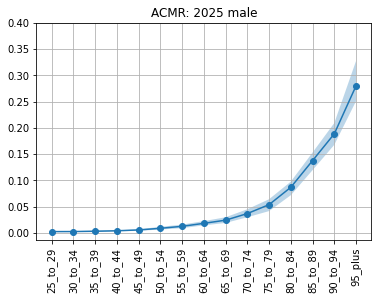

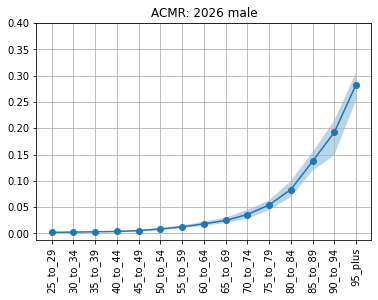

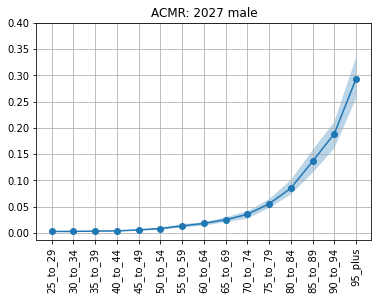

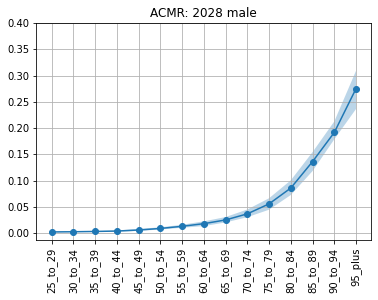

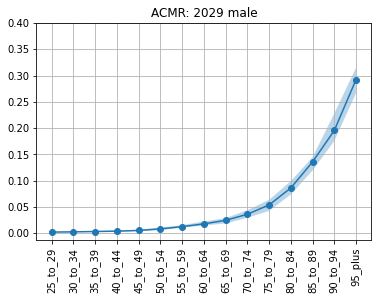

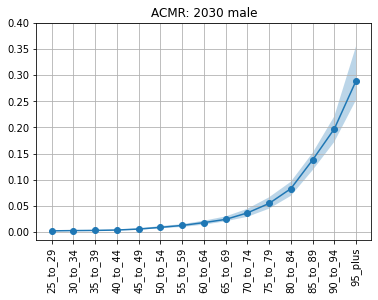

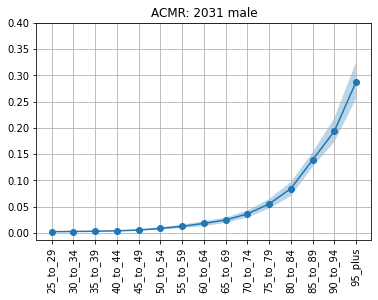

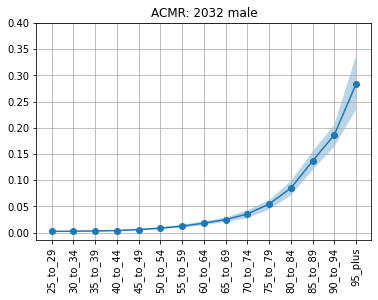

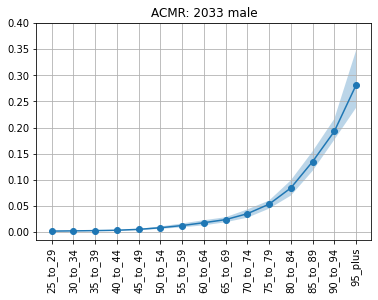

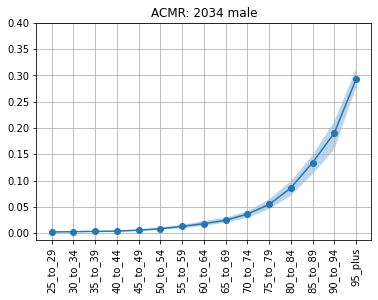

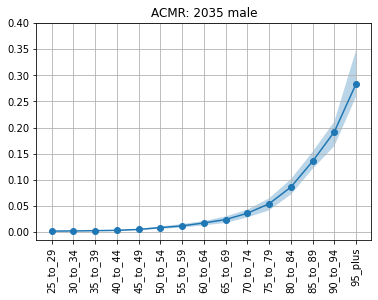

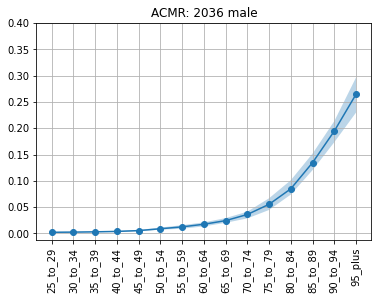

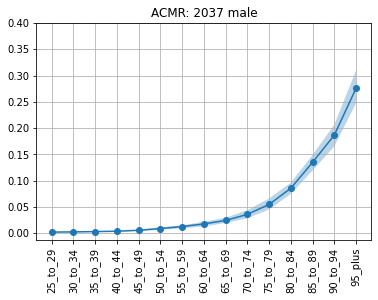

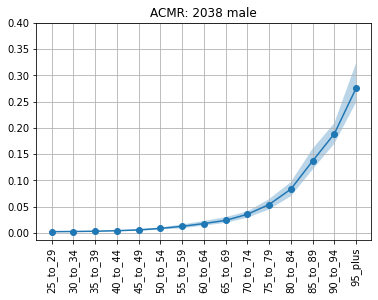

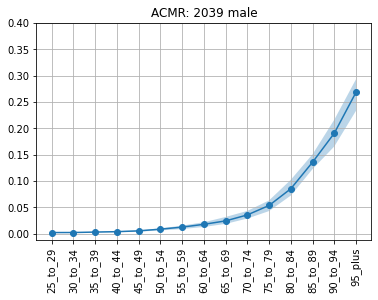

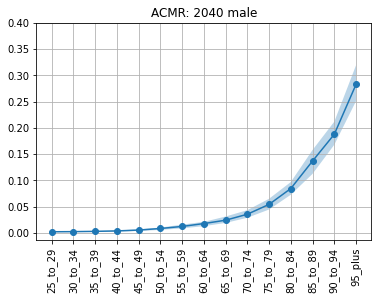

In [32]:
# again for ACMR
with PdfPages('model1vv_acmr.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for year in result_summary.year.unique():
            plt.figure() 
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year)]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
            plt.title(f'ACMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.4)
            plt.grid()
            pdf.savefig(bbox_inches='tight')
            
# this one doesn't seem to have a trend

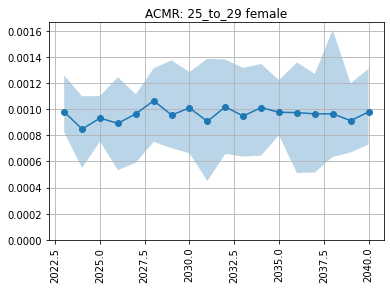

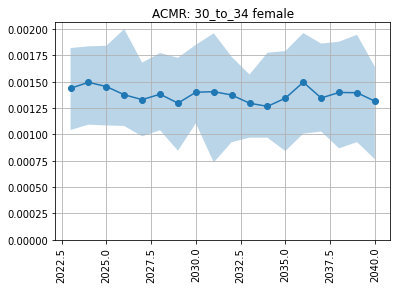

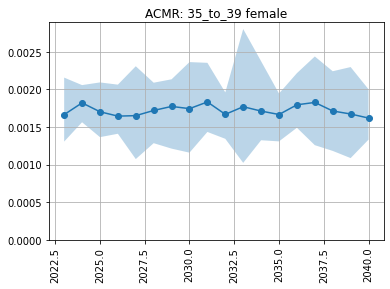

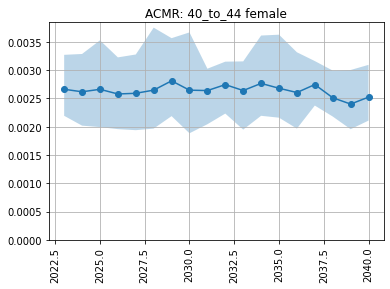

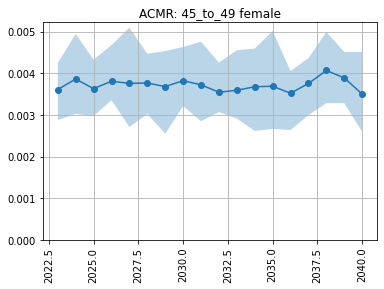

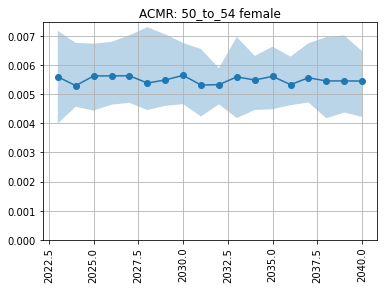

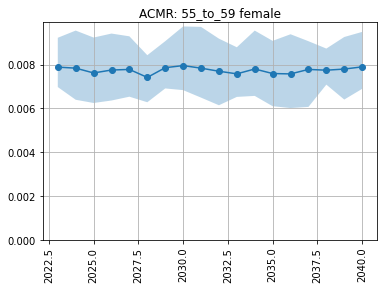

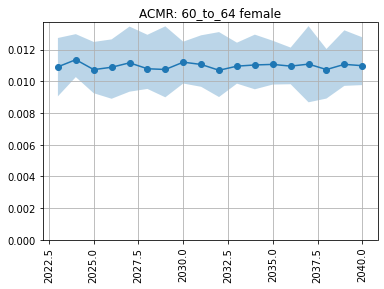

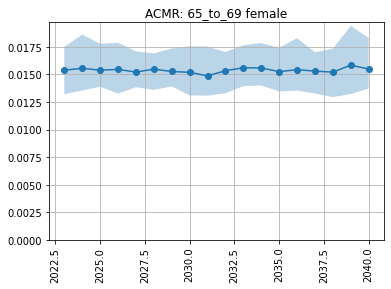

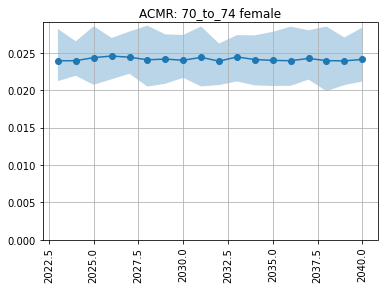

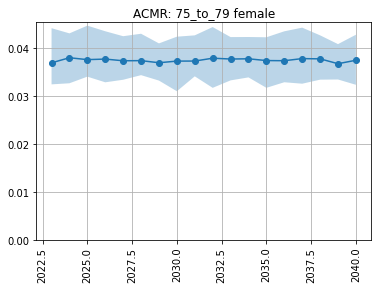

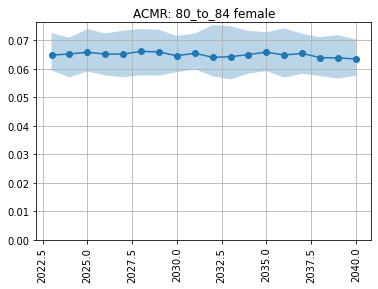

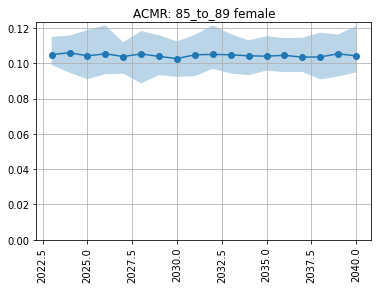

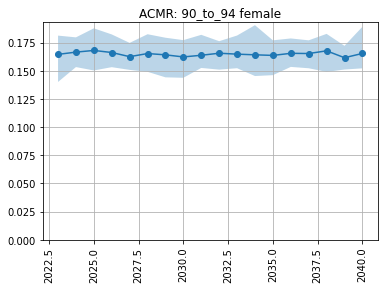

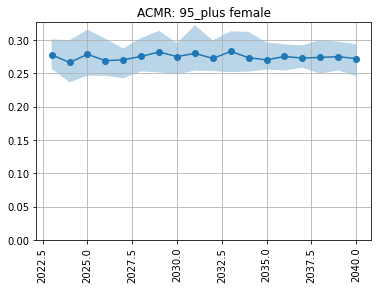

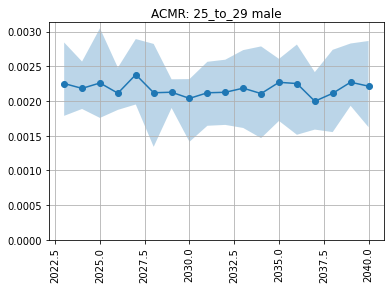

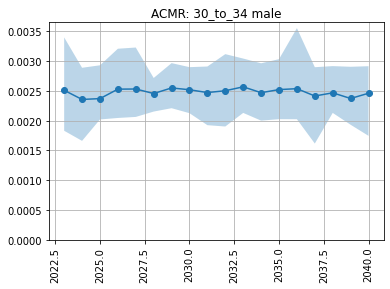

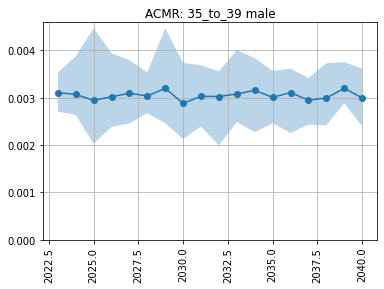

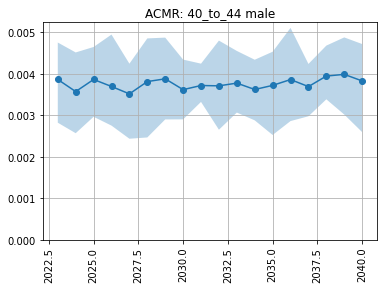

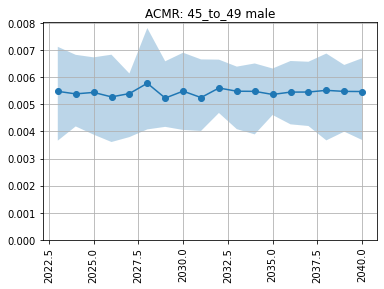

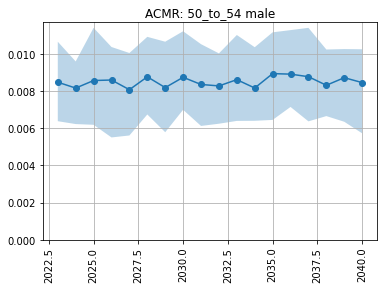

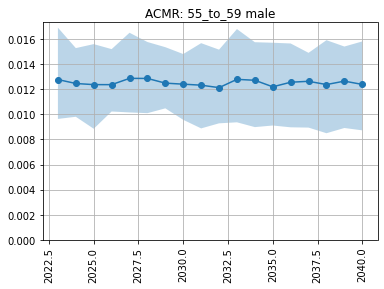

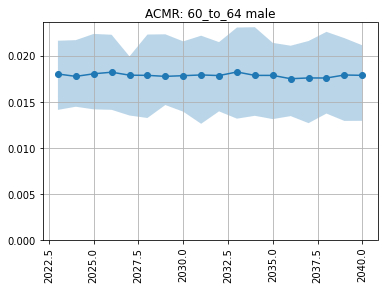

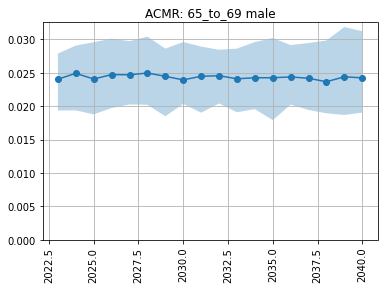

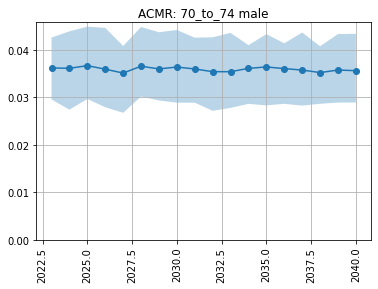

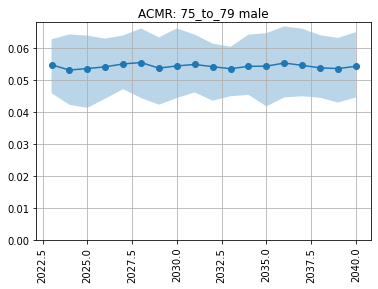

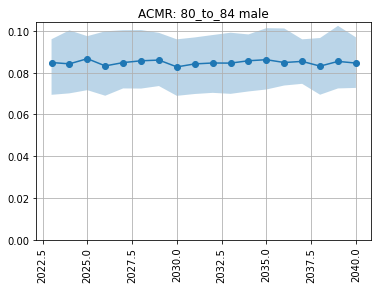

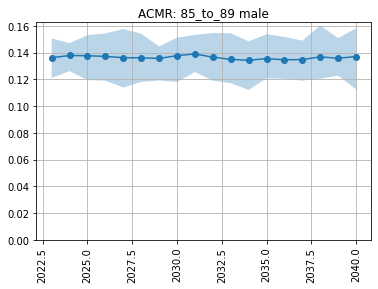

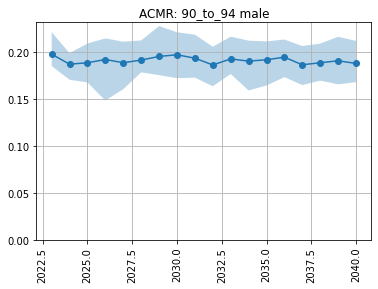

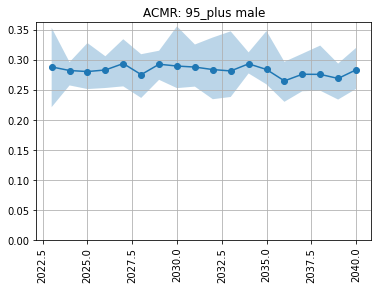

In [33]:
# again for ACMR, this time with reversea age/year variables
with PdfPages('model1vv_acmr_by_year.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for age in result_summary.age.unique():
            plt.figure() 
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.age==age)]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.fill_between(subdata['year'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
            plt.title(f'ACMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymin=0) # when I'm looking at trends over time like this I like to anchor at zero
                # so that we can see if the magnitude of the wiggle is signifiant in relation to the 
                # magnitude of the actual value
            plt.grid()
            pdf.savefig(bbox_inches='tight')
            
# this one doesn't seem to have a trend

### Cause Specific Mortality Graphs
#### Acute Stroke

In [34]:
working = (deaths
               .groupby(['age', 'sex', 'year', 'cause'])
               .value.describe(percentiles=[.025, .975])
               .filter(['mean', '2.5%', '97.5%'])
               .reset_index())

acute = working.loc[(working['cause'] == 'acute_ischemic_stroke')].reset_index()

acute.head()

index       age     sex  year                  cause  mean  2.5%  97.5%
0      0  25_to_29  female  2023  acute_ischemic_stroke   0.1   0.0  0.775
1      3  25_to_29  female  2024  acute_ischemic_stroke   0.2   0.0  1.000
2      6  25_to_29  female  2025  acute_ischemic_stroke   0.0   0.0  0.000
3      9  25_to_29  female  2026  acute_ischemic_stroke   0.1   0.0  0.775
4     12  25_to_29  female  2027  acute_ischemic_stroke   0.1   0.0  0.775

In [40]:
death_rate = deaths.groupby(['age', 'sex', 'year', 'input_draw', 'cause']).value.sum().reset_index()
acute_rate = death_rate.loc[(death_rate['cause'] == 'acute_ischemic_stroke')].reset_index()
acute_rate.head()

index       age     sex  year  input_draw                  cause  value
0      0  25_to_29  female  2023          29  acute_ischemic_stroke      0
1      3  25_to_29  female  2023         232  acute_ischemic_stroke      0
2      6  25_to_29  female  2023         357  acute_ischemic_stroke      0
3      9  25_to_29  female  2023         394  acute_ischemic_stroke      0
4     12  25_to_29  female  2023         602  acute_ischemic_stroke      0

In [41]:
acute_rate_2 = pd.concat([acute_rate, per_time2.ptvalue], axis=1)
acute_rate_2['mean_rate'] = acute_rate_2['value'] / acute_rate_2['ptvalue']

acute_rate_summary = (acute_rate_2
                      .groupby(['age', 'sex', 'year'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

acute_rate_summary.head()

age     sex  year      mean  2.5%     97.5%
0  25_to_29  female  2023  0.000003   0.0  0.000026
1  25_to_29  female  2024  0.000007   0.0  0.000036
2  25_to_29  female  2025  0.000000   0.0  0.000000
3  25_to_29  female  2026  0.000004   0.0  0.000029
4  25_to_29  female  2027  0.000004   0.0  0.000029

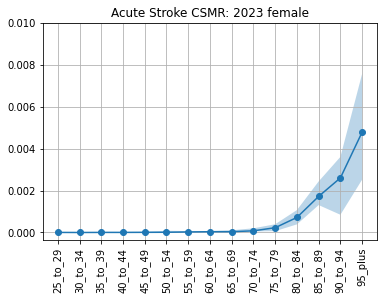

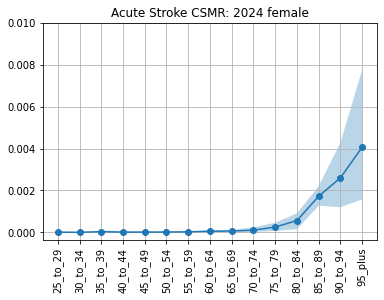

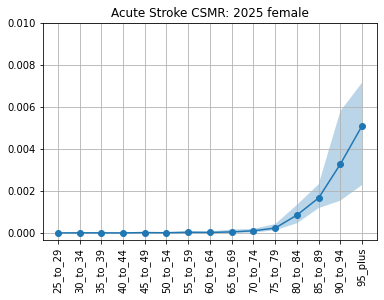

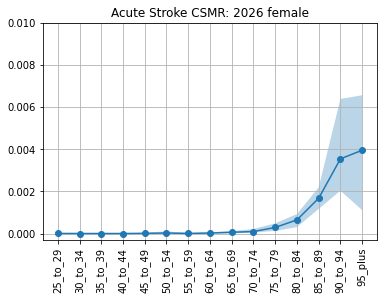

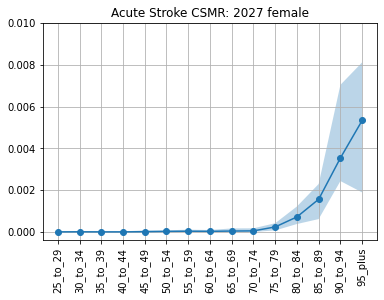

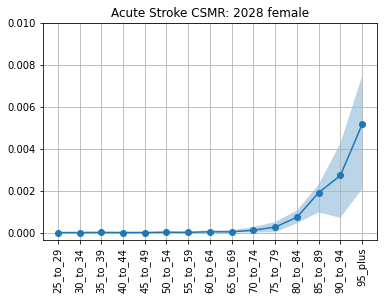

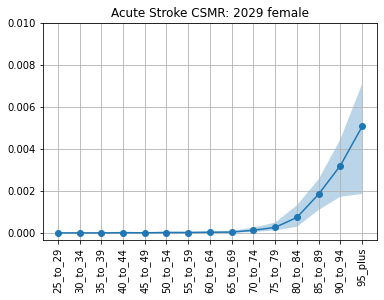

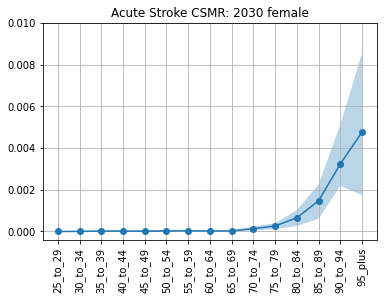

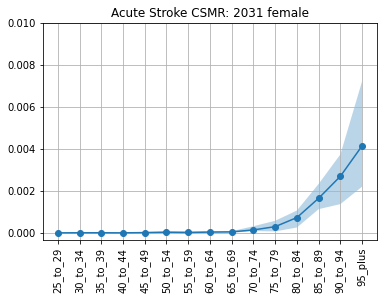

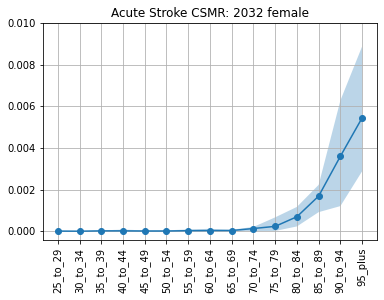

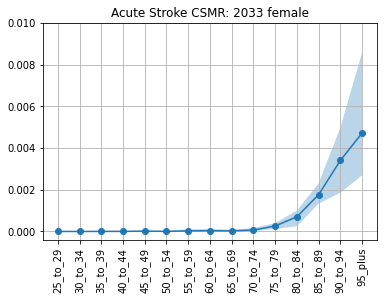

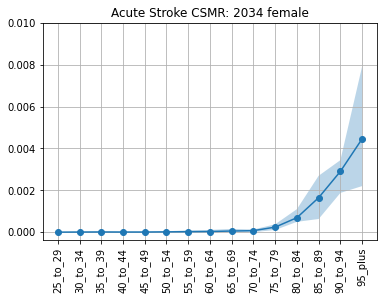

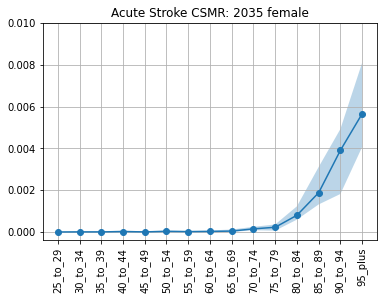

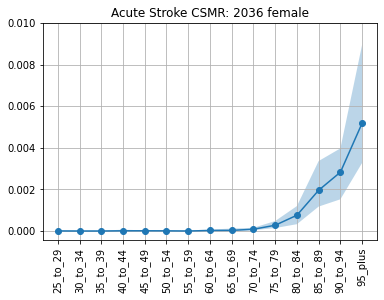

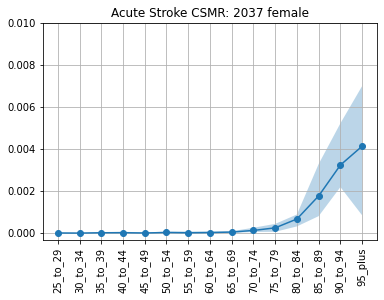

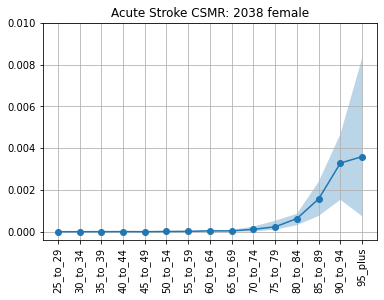

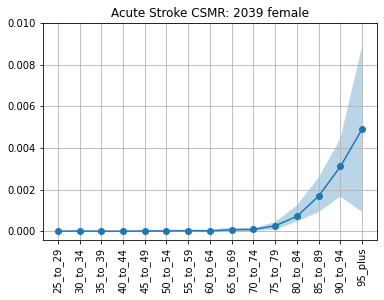

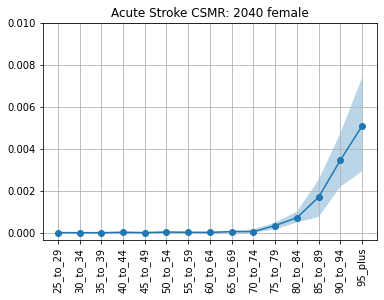

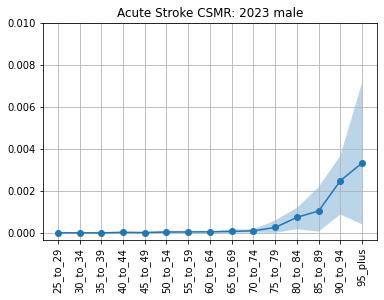

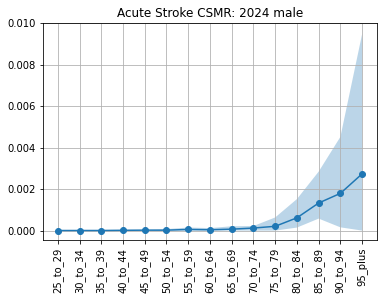

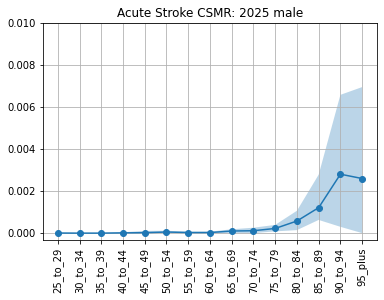

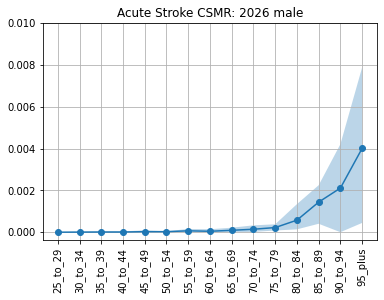

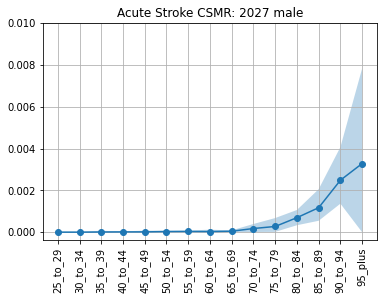

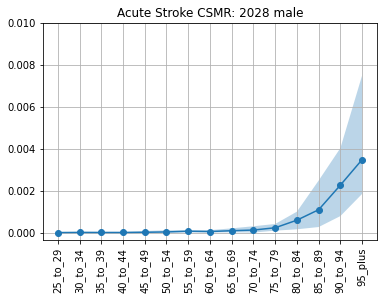

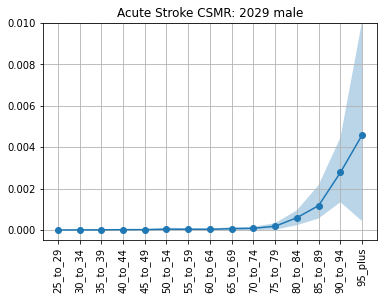

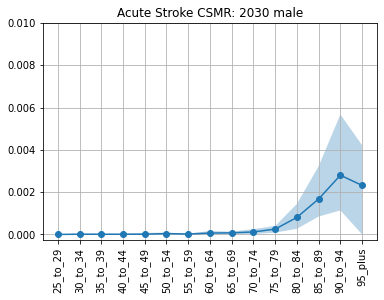

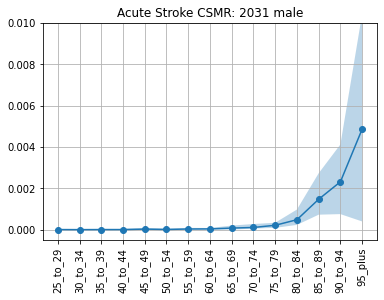

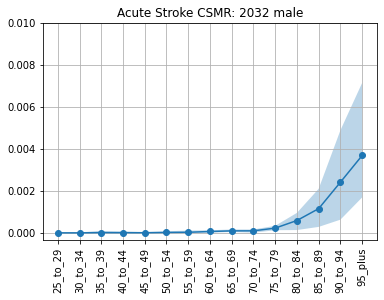

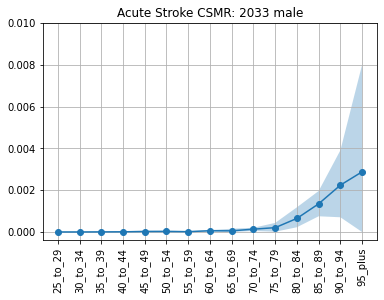

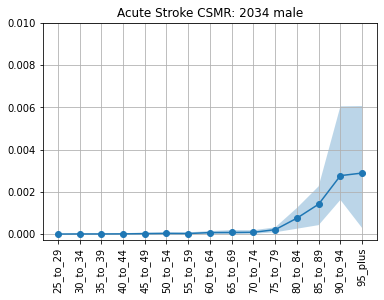

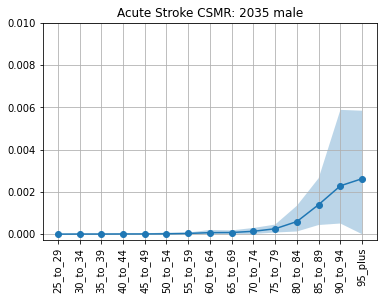

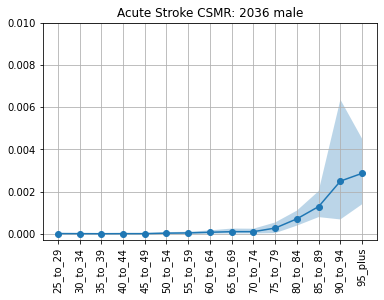

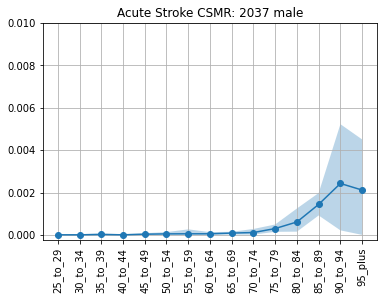

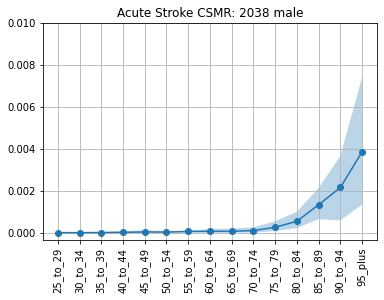

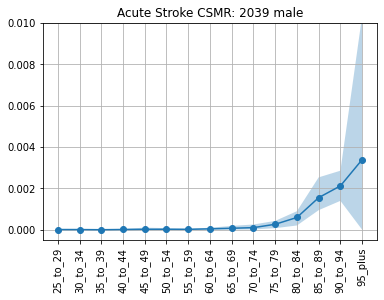

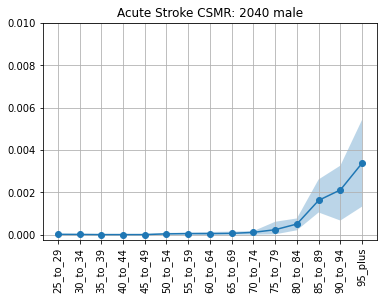

In [42]:
with PdfPages('model1vv_acute_csmr.pdf') as pdf:
    for sex in acute_rate_summary.sex.unique():
        for year in acute_rate_summary.year.unique():
            plt.figure() 
            subdata = acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year)]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
            plt.title(f'Acute Stroke CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.01)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### Chronic Stroke

In [43]:
chronic_rate = death_rate.loc[(death_rate['cause'] == 'chronic_ischemic_stroke')].reset_index()
chronic_rate = pd.concat([chronic_rate, per_time2.ptvalue], axis=1)
chronic_rate['mean_rate'] = chronic_rate['value'] / chronic_rate['ptvalue']
chronic_rate_summ = (chronic_rate
                      .groupby(['age', 'sex', 'year'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

chronic_rate_summ

age     sex  year      mean      2.5%     97.5%
0    25_to_29  female  2023  0.000000  0.000000  0.000000
1    25_to_29  female  2024  0.000000  0.000000  0.000000
2    25_to_29  female  2025  0.000000  0.000000  0.000000
3    25_to_29  female  2026  0.000000  0.000000  0.000000
..        ...     ...   ...       ...       ...       ...
536   95_plus    male  2037  0.007507  0.003076  0.010901
537   95_plus    male  2038  0.009354  0.002068  0.019495
538   95_plus    male  2039  0.009943  0.006546  0.014551
539   95_plus    male  2040  0.010473  0.005248  0.015995

[540 rows x 6 columns]

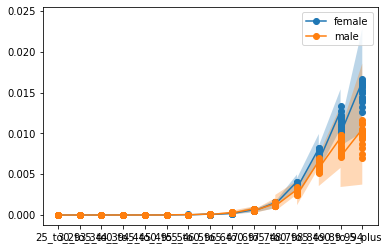

In [44]:
groups = chronic_rate_summ.groupby('sex')
for name, group in groups:
    plt.plot(group['age'], group['mean'], marker='o', label=name)
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)

plt.legend()

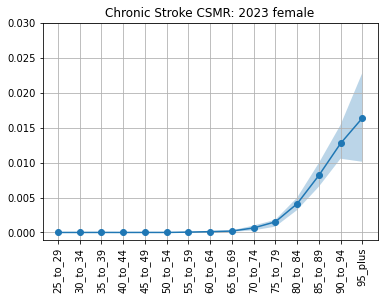

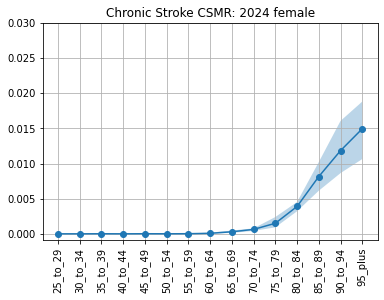

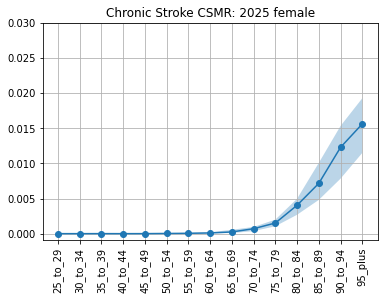

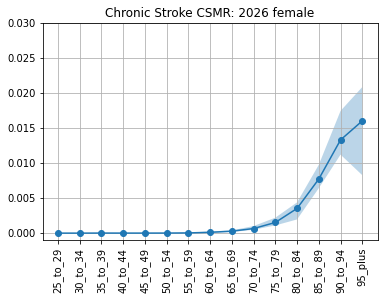

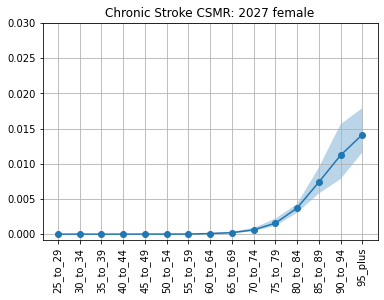

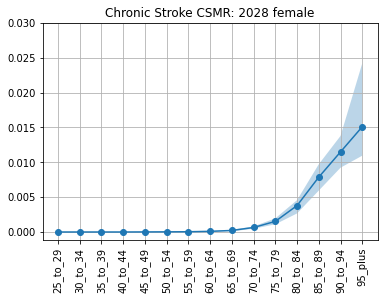

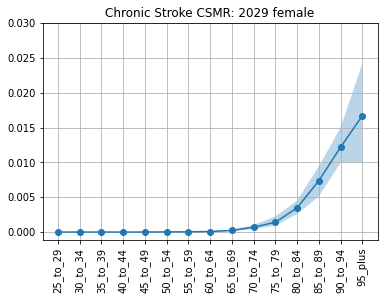

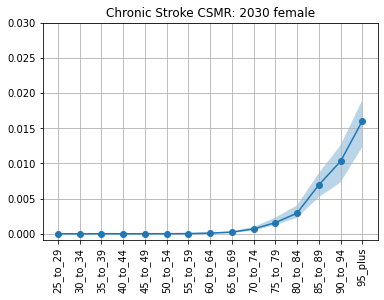

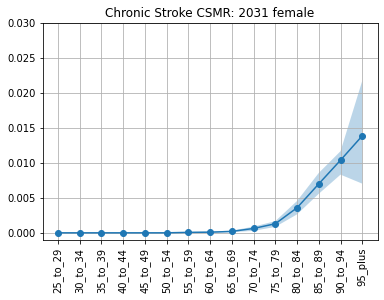

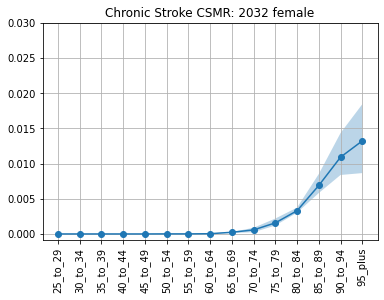

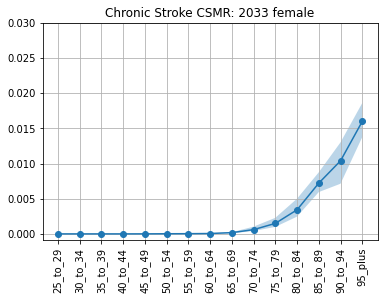

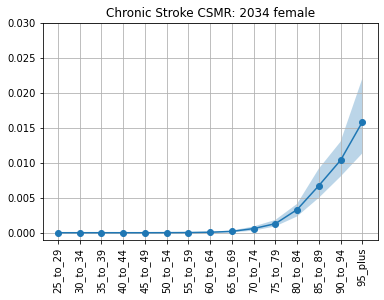

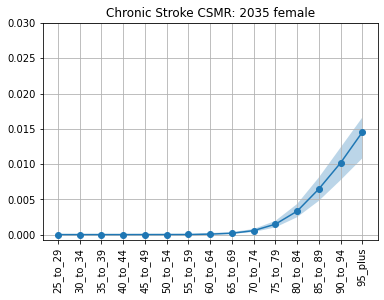

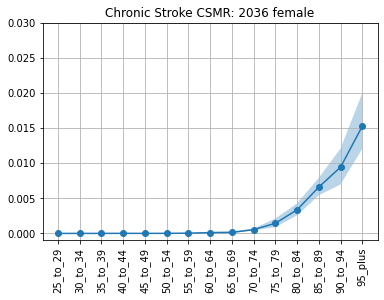

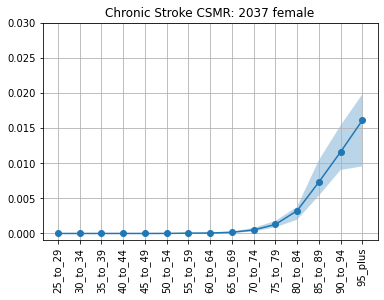

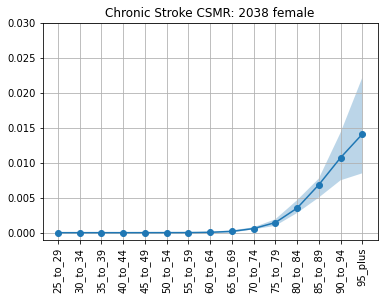

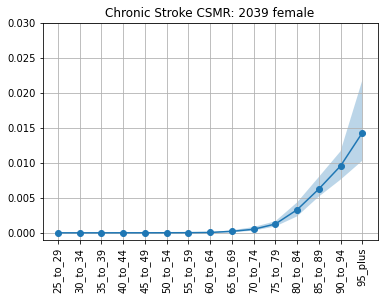

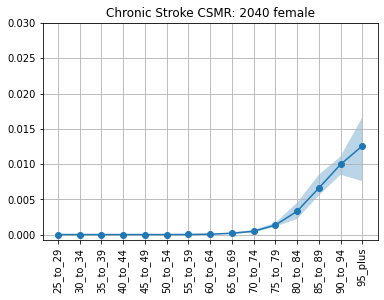

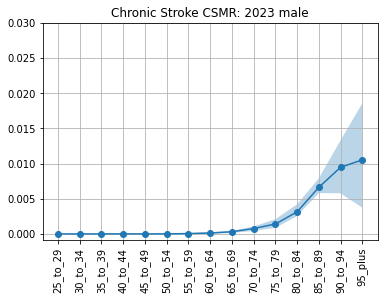

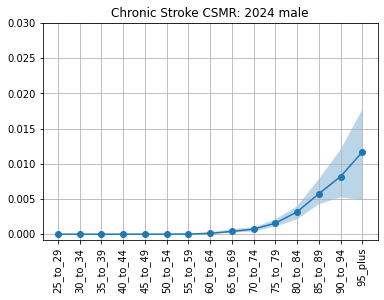

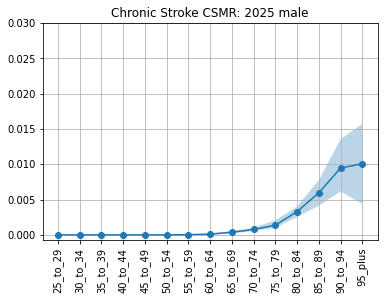

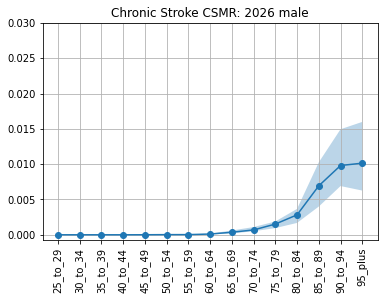

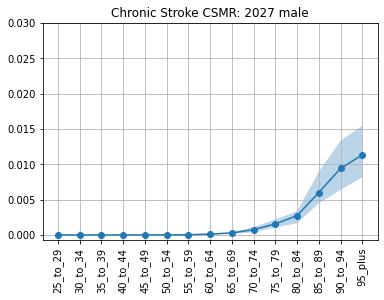

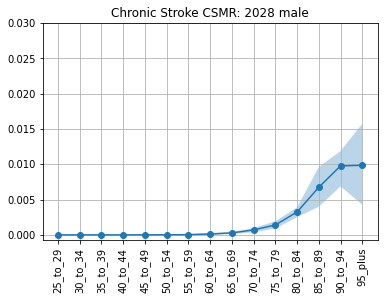

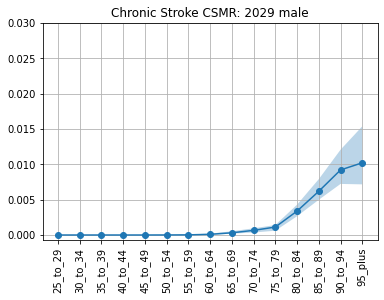

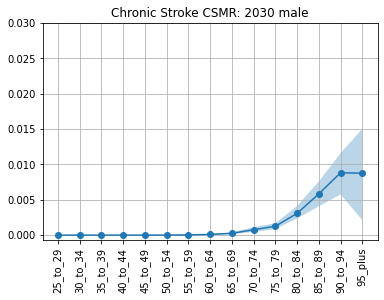

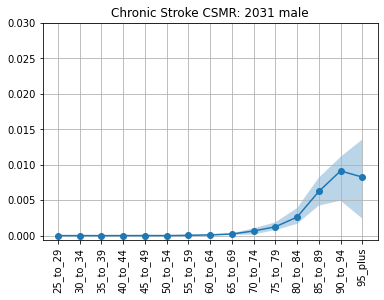

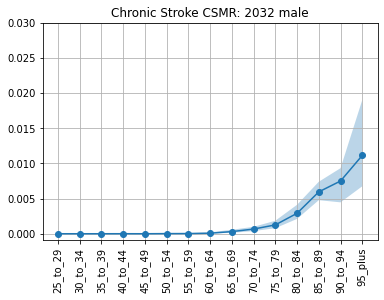

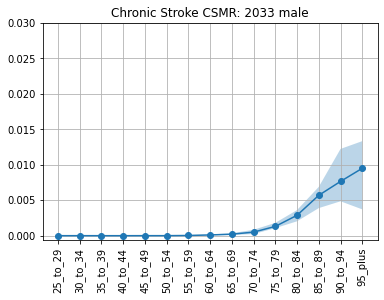

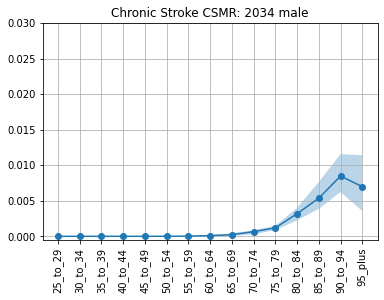

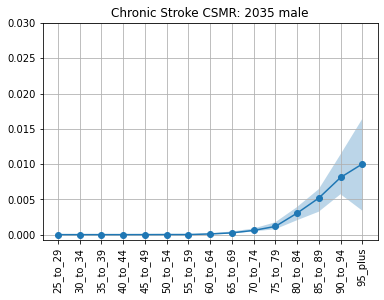

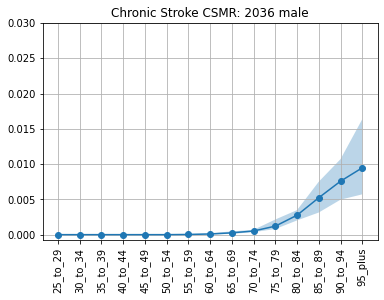

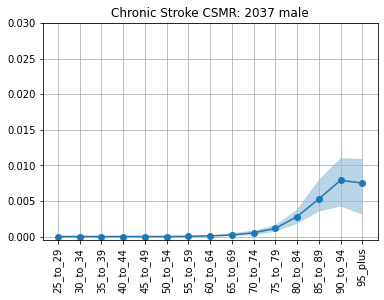

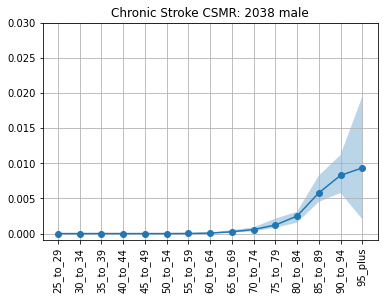

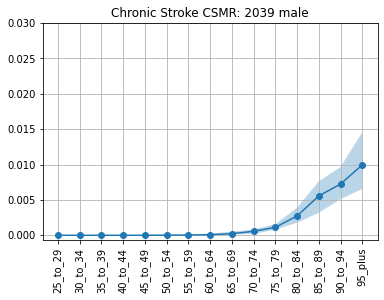

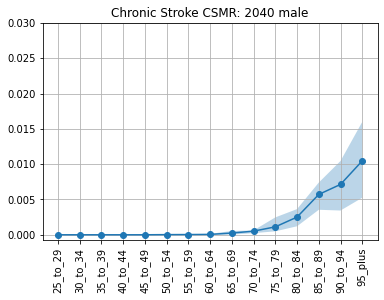

In [45]:
with PdfPages('model1vv_chronic_csmr.pdf') as pdf:
    for sex in chronic_rate_summ.sex.unique():
        for year in chronic_rate_summ.year.unique():
            plt.figure() 
            subdata = chronic_rate_summ.loc[(chronic_rate_summ.sex==sex) & (chronic_rate_summ.year==year)]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
            plt.title(f'Chronic Stroke CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.03)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### Prevalence of Chronic + Acute Stroke

In [46]:
pt = pd.read_csv(sim_results_dir + 'state_person_time.csv')
prev = pt.groupby(['age', 'sex', 'year', 'state', 'input_draw']).value.sum().reset_index()
prev_acute = prev.loc[(prev['state'] == 'acute_ischemic_stroke')].reset_index()
prev_acute_rate = pd.concat([prev_acute, per_time2.ptvalue], axis=1)
prev_acute_rate['rate']= prev_acute_rate['value'] / prev_acute_rate['ptvalue']
prev_acute_rate_sum = (prev_acute_rate
                 .groupby(['age', 'sex', 'year'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

prev_acute_rate_sum.head()

age     sex  year      mean          2.5%     97.5%
0  25_to_29  female  2023  0.000009  2.531586e-06  0.000021
1  25_to_29  female  2024  0.000013  2.737254e-06  0.000029
2  25_to_29  female  2025  0.000009  6.173974e-07  0.000018
3  25_to_29  female  2026  0.000010  2.786613e-06  0.000019
4  25_to_29  female  2027  0.000008  0.000000e+00  0.000027

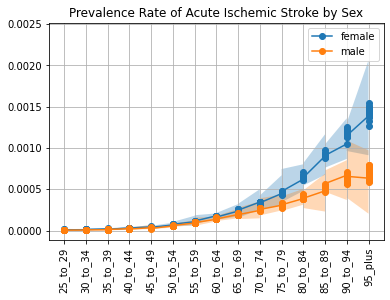

In [47]:
groups = prev_acute_rate_sum.groupby('sex')
for name, group in groups:
    plt.plot(group['age'], group['mean'], marker='o', label=name)
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)
plt.title('Prevalence Rate of Acute Ischemic Stroke by Sex') 
plt.xticks(rotation=90) 
plt.grid()    
plt.legend()

In [48]:
prev_chronic = prev.loc[(prev['state'] == 'chronic_ischemic_stroke')].reset_index()
prev_chronic_rate = pd.concat([prev_chronic, per_time2.ptvalue], axis=1)
prev_chronic_rate['rate']= prev_chronic_rate['value'] / prev_chronic_rate['ptvalue']
prev_chronic_rate_sum = (prev_chronic_rate
                 .groupby(['age', 'sex', 'year'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

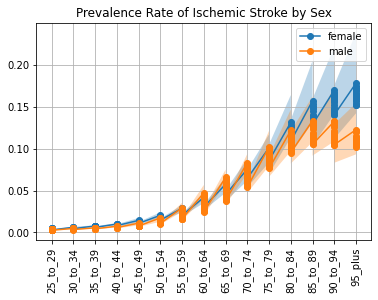

In [49]:
groups = prev_chronic_rate_sum.groupby('sex')
for name, group in groups:
    plt.plot(group['age'], group['mean'], marker='o', label=name)
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)
plt.title('Prevalence Rate of Ischemic Stroke by Sex') 
plt.xticks(rotation=90) 
plt.grid()    
plt.legend()

### Incidence of First Time Acute Ischemic Stroke

In [50]:
tran_sum = (tran
                 .groupby(['age', 'sex', 'year', 'transition'])
                 .value.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

tran_sum = tran_sum.loc[(tran_sum['transition'] == 'susceptible_to_ischemic_stroke_to_acute_ischemic_stroke')].reset_index()
tran_sum.head()

index       age     sex  year  \
0      2  25_to_29  female  2023   
1      5  25_to_29  female  2024   
2      8  25_to_29  female  2025   
3     11  25_to_29  female  2026   
4     14  25_to_29  female  2027   

                                          transition  mean   2.5%   97.5%  
0  susceptible_to_ischemic_stroke_to_acute_ischem...   3.4  1.000   8.325  
1  susceptible_to_ischemic_stroke_to_acute_ischem...   5.0  1.000   9.550  
2  susceptible_to_ischemic_stroke_to_acute_ischem...   3.0  0.225   6.775  
3  susceptible_to_ischemic_stroke_to_acute_ischem...   3.3  1.000   6.775  
4  susceptible_to_ischemic_stroke_to_acute_ischem...   3.1  0.000  10.325

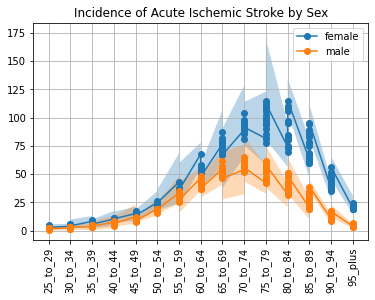

In [51]:
groups = tran_sum.groupby('sex')
for name, group in groups:
    plt.plot(group['age'], group['mean'], marker='o', label=name)
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)
plt.title('Incidence of Acute Ischemic Stroke by Sex') 
plt.xticks(rotation=90) 
plt.grid()    
plt.legend()

In [52]:
per_time_inc = per_time.loc[(per_time['state'] == 'susceptible_to_ischemic_stroke')].reset_index()
per_time_inc.head()

index  Unnamed: 0     sex  year            measure  input_draw  scenario  \
0     30          30  female  2023  state_person_time          29  baseline   
1     31          31  female  2023  state_person_time          29  baseline   
2     32          32  female  2023  state_person_time          29  baseline   
3     33          33  female  2023  state_person_time          29  baseline   
4     34          34  female  2023  state_person_time          29  baseline   

        age                           state          disease       ptvalue  
0  25_to_29  susceptible_to_ischemic_stroke  ischemic_stroke  29808.941821  
1  30_to_34  susceptible_to_ischemic_stroke  ischemic_stroke  28718.225873  
2  35_to_39  susceptible_to_ischemic_stroke  ischemic_stroke  28277.585216  
3  40_to_44  susceptible_to_ischemic_stroke  ischemic_stroke  26599.118412  
4  45_to_49  susceptible_to_ischemic_stroke  ischemic_stroke  27581.590691

In [53]:
per_time_inc = (per_time.groupby(['age', 'sex', 'year', 'input_draw']).ptvalue.sum().reset_index())

per_time_inc.head()

age     sex  year  input_draw       ptvalue
0  25_to_29  female  2023          29  29969.774127
1  25_to_29  female  2023         232  30072.344969
2  25_to_29  female  2023         357  30068.971937
3  25_to_29  female  2023         394  30343.567420
4  25_to_29  female  2023         602  30302.017796

In [54]:
tran = tran.groupby(['age', 'sex', 'year', 'transition', 'input_draw']).value.sum().reset_index()
tran = tran.loc[(tran['transition'] == 'susceptible_to_ischemic_stroke_to_acute_ischemic_stroke')].reset_index()
tran_rate = pd.concat([tran, per_time_inc.ptvalue], axis=1)
tran_rate['rate']= tran_rate['value'] / tran_rate['ptvalue']
tran_rate_sum = (tran_rate
                 .groupby(['age', 'sex', 'year'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

tran_rate_sum.head()

age     sex  year      mean      2.5%     97.5%
0  25_to_29  female  2023  0.000113  0.000033  0.000276
1  25_to_29  female  2024  0.000180  0.000036  0.000344
2  25_to_29  female  2025  0.000109  0.000008  0.000245
3  25_to_29  female  2026  0.000121  0.000036  0.000249
4  25_to_29  female  2027  0.000115  0.000000  0.000384

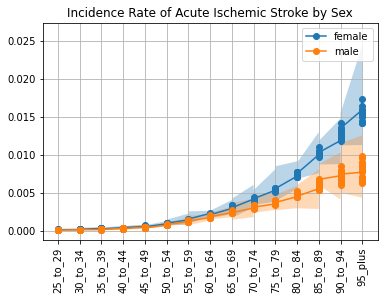

In [55]:
groups = tran_rate_sum.groupby('sex')
for name, group in groups:
    plt.plot(group['age'], group['mean'], marker='o', label=name)
    plt.fill_between(group['age'], group['2.5%'], group['97.5%'], alpha=.3)
plt.title('Incidence Rate of Acute Ischemic Stroke by Sex') 
plt.xticks(rotation=90) 
plt.grid()    
plt.legend()

In [56]:
female_2040_tran_rate = tran_rate_sum.loc[(tran_rate_sum['sex']=='female') & (tran_rate_sum['year']==2040)]
female_2040_tran_rate.head()

age     sex  year      mean      2.5%     97.5%
17   25_to_29  female  2040  0.000115  0.000009  0.000230
53   30_to_34  female  2040  0.000161  0.000038  0.000375
89   35_to_39  female  2040  0.000217  0.000076  0.000372
125  40_to_44  female  2040  0.000386  0.000267  0.000620
161  45_to_49  female  2040  0.000508  0.000281  0.000705

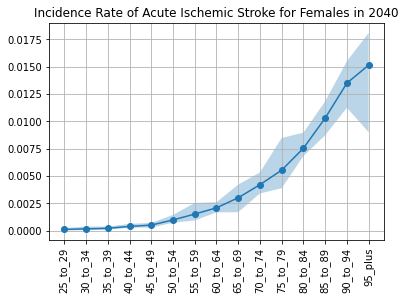

In [57]:
plt.plot(female_2040_tran_rate['age'], female_2040_tran_rate['mean'], marker='o')
plt.fill_between(female_2040_tran_rate['age'], female_2040_tran_rate['2.5%'], female_2040_tran_rate['97.5%'], alpha=.3)
plt.title('Incidence Rate of Acute Ischemic Stroke for Females in 2040') 
plt.xticks(rotation=90) 
plt.grid()    

In [58]:
female_6064_tran_rate = tran_rate_sum.loc[(tran_rate_sum['sex']=='female') & (tran_rate_sum['age']=='60_to_64')]
female_6064_tran_rate.head()

age     sex  year      mean      2.5%     97.5%
252  60_to_64  female  2023  0.002265  0.001860  0.002610
253  60_to_64  female  2024  0.001993  0.001544  0.002785
254  60_to_64  female  2025  0.002022  0.001662  0.002552
255  60_to_64  female  2026  0.001989  0.001407  0.002487
256  60_to_64  female  2027  0.002124  0.001863  0.002452

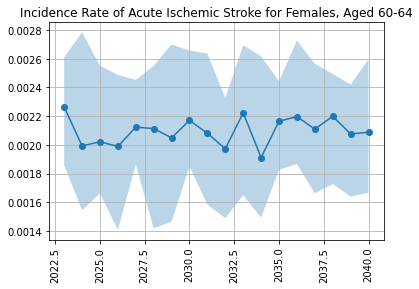

In [59]:
plt.plot(female_6064_tran_rate['year'], female_6064_tran_rate['mean'], marker='o')
plt.fill_between(female_6064_tran_rate['year'], female_6064_tran_rate['2.5%'], female_6064_tran_rate['97.5%'], alpha=.3)
plt.title('Incidence Rate of Acute Ischemic Stroke for Females, Aged 60-64') 
plt.xticks(rotation=90) 
plt.grid()    

### Artifacts

In [60]:
ls /mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/

alabama.hdf  washington.hdf


In [61]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf', filter_terms=['year_start == 2019', 'age_start >=  25'])

In [62]:
art_pop = art.load('population.structure').reset_index()
art_pop

location     sex  age_start  age_end  year_start  year_end          value
0   Alabama  Female       25.0     30.0        2019      2020  171101.787730
1   Alabama  Female       30.0     35.0        2019      2020  162707.127245
2   Alabama  Female       35.0     40.0        2019      2020  160738.561697
3   Alabama  Female       40.0     45.0        2019      2020  151811.937430
..      ...     ...        ...      ...         ...       ...            ...
26  Alabama    Male       80.0     85.0        2019      2020   39717.256293
27  Alabama    Male       85.0     90.0        2019      2020   20451.497955
28  Alabama    Male       90.0     95.0        2019      2020    8076.996387
29  Alabama    Male       95.0    125.0        2019      2020    2550.613480

[30 rows x 7 columns]

In [63]:
art.keys

['metadata.keyspace',
 'metadata.locations',
 'population.location',
 'population.structure',
 'population.age_bins',
 'population.demographic_dimensions',
 'population.theoretical_minimum_risk_life_expectancy',
 'cause.all_causes.cause_specific_mortality_rate',
 'sequela.acute_ischemic_stroke.prevalence',
 'sequela.chronic_ischemic_stroke.prevalence',
 'cause.ischemic_stroke.incidence_rate',
 'sequela.acute_ischemic_stroke.disability_weight',
 'sequela.chronic_ischemic_stroke.disability_weight',
 'sequela.acute_ischemic_stroke.excess_mortality_rate',
 'sequela.chronic_ischemic_stroke.excess_mortality_rate',
 'cause.ischemic_stroke.cause_specific_mortality_rate',
 'cause.ischemic_stroke.restrictions',
 'cause.acute_myocardial_infarction.prevalence',
 'cause.post_myocardial_infarction.prevalence',
 'cause.acute_myocardial_infarction.incidence_rate',
 'cause.post_myocardial_infarction.incidence_rate',
 'cause.acute_myocardial_infarction.disability_weight',
 'cause.post_myocardial_infarct

In [64]:
art_mort = art.load('sequela.acute_ischemic_stroke.excess_mortality_rate').reset_index()
art_mort.head()

sex  age_start  age_end  year_start  year_end   draw_0   draw_1  \
0  Female       25.0     30.0        2019      2020  0.31588  0.40003   
1  Female       30.0     35.0        2019      2020  0.30193  0.33175   
2  Female       35.0     40.0        2019      2020  0.28018  0.29485   
3  Female       40.0     45.0        2019      2020  0.24315  0.27495   
4  Female       45.0     50.0        2019      2020  0.19085  0.27205   

    draw_2   draw_3   draw_4  ...  draw_990  draw_991  draw_992  draw_993  \
0  0.32045  0.38893  0.24140  ...   0.27915   0.29902   0.33340   0.28170   
1  0.28828  0.37140  0.24475  ...   0.27680   0.29742   0.35445   0.23455   
2  0.27522  0.29580  0.32445  ...   0.29240   0.29728   0.32355   0.24025   
3  0.29525  0.26428  0.35000  ...   0.28105   0.31522   0.29495   0.24098   
4  0.34835  0.27682  0.32140  ...   0.24275   0.35128   0.26865   0.23673   

   draw_994  draw_995  draw_996  draw_997  draw_998  draw_999  
0   0.45043   0.26388   0.31837   0.28815   0.23798   0.20685  
1   0.42553   0.22783   0.26775   0.28548   0.25033   0.25325  
2   0.35158   0.27568   0.30525   0.40163   0.30818   0.44195  
3   0.31315   0.28515   0.32320   0.41060   0.31078   0.45695  
4   0.31025   0.25625   0.32160   0.31240   0.25812   0.29825  

[5 rows x 1005 columns]

In [65]:
def load_artifact_data(word:str, cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['alabama']: #in case there are other countries
        
        # grab main artifact object
        art = Artifact('/mnt/share/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start >=  25']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        # load requested measure
        data = art.load(word + '.' + cause + '.' + measure)
        
        # collapse to desired percentiles
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        # formatting (may want to format age as well)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
   
        master_art_data = master_art_data.append(data)
        
    return master_art_data

#### All Cause Mortality Rates

In [66]:
art_acmr = load_artifact_data('cause', 'all_causes', 'cause_specific_mortality_rate')
art_acmr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_acmr.age_start,art_acmr.age_end)]
art_acmr.head()

sex  age_start  age_end  year_start  year_end      mean      2.5%  \
0  female       25.0     30.0        2019      2020  0.000950  0.000706   
1  female       30.0     35.0        2019      2020  0.001364  0.001029   
2  female       35.0     40.0        2019      2020  0.001697  0.001285   
3  female       40.0     45.0        2019      2020  0.002592  0.001978   
4  female       45.0     50.0        2019      2020  0.003660  0.002792   

      97.5% location                        measure age_group  
0  0.001237  Alabama  cause_specific_mortality_rate  25_to_29  
1  0.001755  Alabama  cause_specific_mortality_rate  30_to_34  
2  0.002179  Alabama  cause_specific_mortality_rate  35_to_39  
3  0.003305  Alabama  cause_specific_mortality_rate  40_to_44  
4  0.004668  Alabama  cause_specific_mortality_rate  45_to_49

In [67]:
result_summary_allyears = (results_rate
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary_allyears.head()

age     sex      mean      2.5%     97.5%
0  25_to_29  female  0.000962  0.000489  0.001377
1  25_to_29    male  0.002173  0.001508  0.002888
2  30_to_34  female  0.001379  0.000854  0.001891
3  30_to_34    male  0.002479  0.001867  0.003227
4  35_to_39  female  0.001721  0.001128  0.002425

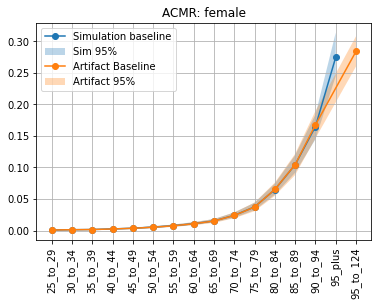

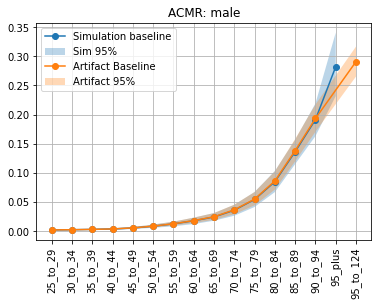

In [68]:
with PdfPages('model1vv_acmr_artifact_and_sim.pdf') as pdf:
    for sex in result_summary_allyears.sex.unique():
        plt.figure() 
        subdata = result_summary_allyears.loc[(result_summary_allyears.sex==sex)]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
        subdata2 = art_acmr.loc[(art_acmr.sex==sex)]
        plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
        plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
        plt.title(f'ACMR: {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

In [69]:
# also, you can make a function to make these plots and then reuse it for different measures

def make_sim_vs_artifact_plots_by_age(sex, year, sim_data, art_data, measure):
    plt.figure(dpi=120) # this dpi makes the figure a little bigger and more clear
    plt.plot(sim_data.loc[(sim_data.sex==sex) & (sim_data.year==year)].age,
            sim_data.loc[(sim_data.sex==sex) & (sim_data.year==year)]['mean'], marker='o')
    plt.plot(art_data.loc[(art_data.sex==sex)].age_group,
            art_data.loc[(art_data.sex==sex)]['mean'], marker='o')
    plt.legend(['Simulation baseline', 'Artifact']) # legend so we know which color is which
    plt.xticks(rotation=90)
    plt.title(f'{measure}: {sex} {year}') # title for ease of review
    plt.grid()
    plt.semilogy()

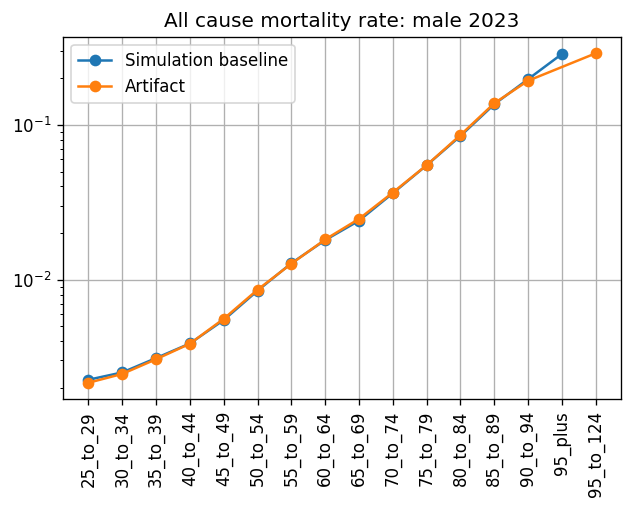

In [70]:
make_sim_vs_artifact_plots_by_age('male', 2023, result_summary, art_acmr, 'All cause mortality rate')

#then, you could input different dataframes for sim_data and art_data that contain different measures 
# (like prevalence/incidence/etc) and make a bunch of plots for different measures all at once.

#### Cause Specific Mortality Rates

In [71]:
art_csmr = load_artifact_data('cause', 'ischemic_stroke', 'cause_specific_mortality_rate') 
art_csmr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_acmr.age_start,art_acmr.age_end)]
art_csmr.head()

sex  age_start  age_end  year_start  year_end      mean      2.5%  \
0  female       25.0     30.0        2019      2020  0.000002  0.000001   
1  female       30.0     35.0        2019      2020  0.000004  0.000002   
2  female       35.0     40.0        2019      2020  0.000006  0.000003   
3  female       40.0     45.0        2019      2020  0.000011  0.000007   
4  female       45.0     50.0        2019      2020  0.000017  0.000011   

      97.5% location                        measure age_group  
0  0.000003  Alabama  cause_specific_mortality_rate  25_to_29  
1  0.000007  Alabama  cause_specific_mortality_rate  30_to_34  
2  0.000009  Alabama  cause_specific_mortality_rate  35_to_39  
3  0.000016  Alabama  cause_specific_mortality_rate  40_to_44  
4  0.000026  Alabama  cause_specific_mortality_rate  45_to_49

In [72]:
acute_rate_sum_allyear = (acute_rate_2
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

In [73]:
chronic_rate_allyear = (chronic_rate
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

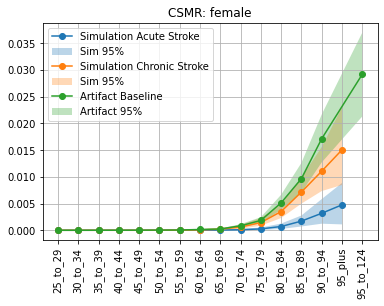

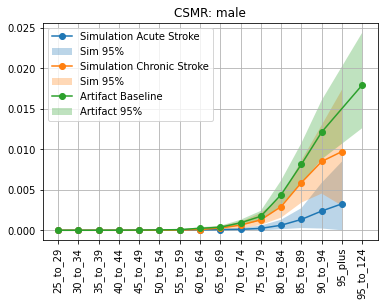

In [74]:
with PdfPages('model1vv_csmr_artifact_and_sim.pdf') as pdf:
    for sex in acute_rate_sum_allyear.sex.unique():
        plt.figure() 
        subdata = acute_rate_sum_allyear.loc[(acute_rate_sum_allyear.sex==sex)]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
        subdata2 = chronic_rate_allyear.loc[(chronic_rate_allyear.sex==sex)]
        plt.plot(subdata2['age'], subdata2['mean'], marker='o')
        plt.fill_between(subdata2['age'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
        subdata3 = art_csmr.loc[(art_csmr.sex==sex)]
        plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
        plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
        plt.title(f'CSMR: {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation Acute Stroke', 'Sim 95%', 'Simulation Chronic Stroke', 'Sim 95%','Artifact Baseline', 'Artifact 95%']) 

#### Incidence Rates

In [75]:
art_inc = load_artifact_data('cause', 'ischemic_stroke', 'incidence_rate')
art_inc['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_inc.age_start,art_inc.age_end)]
art_inc.head()

sex  age_start  age_end  year_start  year_end      mean      2.5%  \
0  female       25.0     30.0        2019      2020  0.000116  0.000050   
1  female       30.0     35.0        2019      2020  0.000163  0.000091   
2  female       35.0     40.0        2019      2020  0.000232  0.000128   
3  female       40.0     45.0        2019      2020  0.000370  0.000242   
4  female       45.0     50.0        2019      2020  0.000579  0.000343   

      97.5% location         measure age_group  
0  0.000225  Alabama  incidence_rate  25_to_29  
1  0.000266  Alabama  incidence_rate  30_to_34  
2  0.000381  Alabama  incidence_rate  35_to_39  
3  0.000552  Alabama  incidence_rate  40_to_44  
4  0.000939  Alabama  incidence_rate  45_to_49

In [76]:
tran_rate_sum_allyear = (tran_rate
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

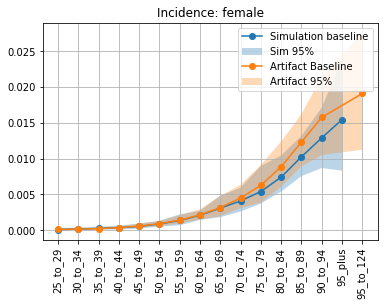

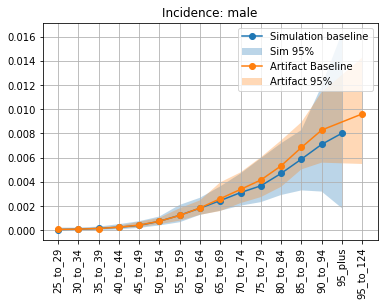

In [77]:
with PdfPages('model1vv_inc_artifact_and_sim.pdf') as pdf:
    for sex in tran_rate_sum_allyear.sex.unique():
        plt.figure() 
        subdata = tran_rate_sum_allyear.loc[(tran_rate_sum_allyear.sex==sex)]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
        subdata2 = art_inc.loc[(art_inc.sex==sex)]
        plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
        plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
        plt.title(f'Incidence: {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

# The simulation only includes suseptible to acute, the consistent underestimation is probably 
# chronic relapses to acute strokes 

#### Prevalence Rates

In [78]:
prev_chronic_rate_sum_allyear = (prev_chronic_rate
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

In [79]:
art_prev = load_artifact_data('sequela', 'chronic_ischemic_stroke', 'prevalence')
art_prev['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev.age_start,art_prev.age_end)]
art_prev.head()

sex  age_start  age_end  year_start  year_end      mean      2.5%  \
0  female       25.0     30.0        2019      2020  0.004986  0.003708   
1  female       30.0     35.0        2019      2020  0.006119  0.004613   
2  female       35.0     40.0        2019      2020  0.007737  0.005971   
3  female       40.0     45.0        2019      2020  0.010115  0.007659   
4  female       45.0     50.0        2019      2020  0.014078  0.010695   

      97.5% location     measure age_group  
0  0.006410  Alabama  prevalence  25_to_29  
1  0.007857  Alabama  prevalence  30_to_34  
2  0.010016  Alabama  prevalence  35_to_39  
3  0.013100  Alabama  prevalence  40_to_44  
4  0.018031  Alabama  prevalence  45_to_49

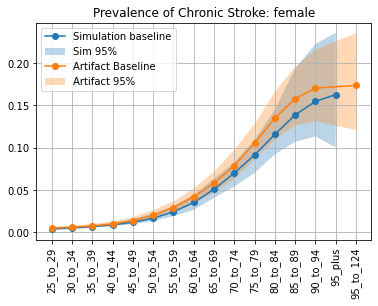

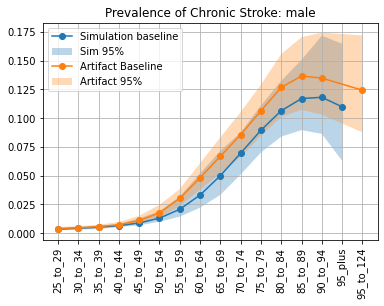

In [80]:
for sex in prev_chronic_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = prev_chronic_rate_sum_allyear.loc[(prev_chronic_rate_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev.loc[(art_prev.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of Chronic Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

In [81]:
prev_acute_rate_sum_allyear = (prev_acute_rate
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

In [82]:
art_prev2 = load_artifact_data('sequela', 'acute_ischemic_stroke', 'prevalence')
art_prev2['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev2.age_start,art_prev2.age_end)]

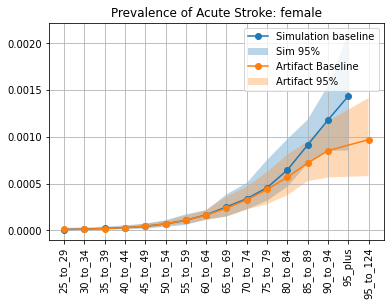

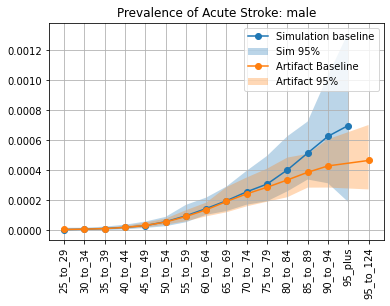

In [83]:
for sex in prev_acute_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = prev_acute_rate_sum_allyear.loc[(prev_acute_rate_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev2.loc[(art_prev2.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of Acute Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

    
# Sim appears to overestimate the prevalence here - not sure why this might be. Digging into it more

#### Excess Mortality Rate

In [84]:
art_emr = load_artifact_data('sequela', 'acute_ischemic_stroke', 'excess_mortality_rate')
art_emr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr.age_start,art_emr.age_end)]
art_emr.head()

sex  age_start  age_end  year_start  year_end      mean      2.5%  \
0  female       25.0     30.0        2019      2020  0.309244  0.212204   
1  female       30.0     35.0        2019      2020  0.293380  0.198519   
2  female       35.0     40.0        2019      2020  0.323206  0.234077   
3  female       40.0     45.0        2019      2020  0.322984  0.238528   
4  female       45.0     50.0        2019      2020  0.292713  0.203912   

      97.5% location                measure age_group  
0  0.442095  Alabama  excess_mortality_rate  25_to_29  
1  0.416337  Alabama  excess_mortality_rate  30_to_34  
2  0.432974  Alabama  excess_mortality_rate  35_to_39  
3  0.438779  Alabama  excess_mortality_rate  40_to_44  
4  0.393501  Alabama  excess_mortality_rate  45_to_49

In [85]:
prev_acute = prev.loc[(prev['state'] == 'acute_ischemic_stroke')].reset_index()
prev_acute = prev_acute.rename(columns = {'value':'ptvalue'})
acute_rate_emr = pd.concat([acute_rate, prev_acute.ptvalue], axis=1)
acute_rate_emr['mean_rate'] = acute_rate_emr['value'] / acute_rate_emr['ptvalue']

acute_rate_sum_allyear = (acute_rate_emr
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

acute_rate_sum_allyear.head()

age     sex      mean  2.5%     97.5%
0  25_to_29  female  0.257875   0.0  2.608929
1  25_to_29    male  0.695343   0.0  6.522321
2  30_to_34  female  0.174683   0.0  2.608929
3  30_to_34    male  0.542834   0.0  4.348214
4  35_to_39  female  0.362425   0.0  3.261161

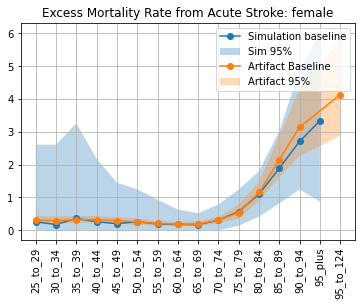

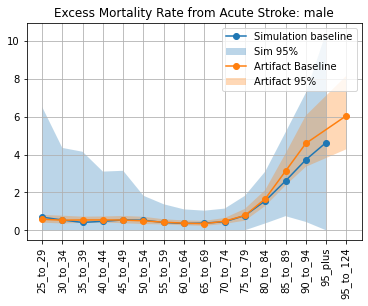

In [86]:
for sex in acute_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = acute_rate_sum_allyear.loc[(acute_rate_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr.loc[(art_emr.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from Acute Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

In [87]:
art_emr2 = load_artifact_data('sequela', 'chronic_ischemic_stroke', 'excess_mortality_rate')
art_emr2['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr2.age_start,art_emr2.age_end)]

In [88]:
chronic = prev.loc[(prev['state'] == 'chronic_ischemic_stroke')].reset_index()
chronic = chronic.rename(columns = {'value':'ptvalue'})
chronic_rate = death_rate.loc[(death_rate['cause'] == 'chronic_ischemic_stroke')].reset_index()
chronic_rate_emr = pd.concat([chronic_rate, chronic.ptvalue], axis=1)
chronic_rate_emr['mean_rate'] = chronic_rate_emr['value'] / chronic_rate_emr['ptvalue']
chronic_rate_emr_allyear = (chronic_rate_emr
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())


chronic_rate_emr_allyear.head()

age     sex      mean  2.5%    97.5%
0  25_to_29  female  0.000000   0.0  0.00000
1  25_to_29    male  0.000000   0.0  0.00000
2  30_to_34  female  0.000031   0.0  0.00000
3  30_to_34    male  0.000100   0.0  0.00000
4  35_to_39  female  0.000169   0.0  0.00452

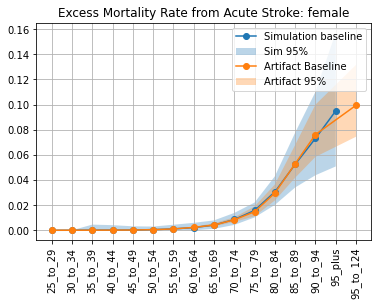

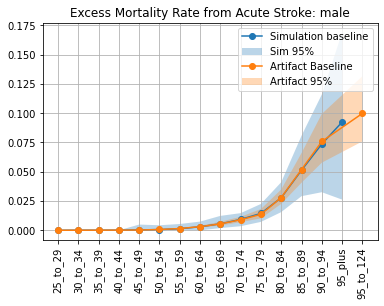

In [89]:
for sex in chronic_rate_emr_allyear.sex.unique():
    plt.figure() 
    subdata = chronic_rate_emr_allyear.loc[(chronic_rate_emr_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr2.loc[(art_emr2.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from Acute Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

### GBD Comparison

#### All Cause Mortality Rate

In [110]:
from db_queries import get_outputs as go

In [112]:
#gbd_data = go("cause", gbd_round_id=5, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=294, measure_id=1, metric_id=3, location_id=523, year_id=2017, sex_id=[1,2])

In [ ]:
gbd_data['age'] = gbd_data.age_group_name.str.replace(' ', '_')
gbd_data.head()

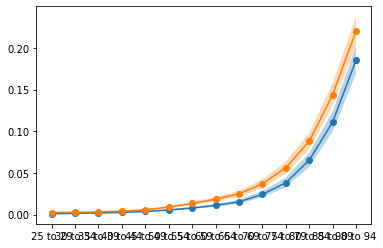

In [113]:
for sex in result_summary_allyears.sex.unique():
    plt.figure() 
    subdata = result_summary_allyears.loc[(result_summary_allyears.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_data.loc[(gbd_data.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'All Cause Mortality Rate: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'Artifact 95%']) 

#groups = df.groupby('sex')
#for name, group in groups:
#    plt.plot(group['age_group_name'], group['val'], marker='o', label=name)
#    plt.fill_between(group['age_group_name'], group['upper'], group['lower'], alpha=.3)

#### Incidence Rate

In [96]:
#gbd_incd = go("cause", gbd_round_id=5, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=495, measure_id=6, metric_id=3, location_id=523, year_id=2017, sex_id=[1,2])

In [116]:
gbd_incd['age'] = gbd_incd.age_group_name.str.replace(' ', '_')
gbd_incd.head()

age_group_id  cause_id  location_id  measure_id  metric_id  sex_id  \
0            10       495          523           6          3       1   
1            10       495          523           6          3       2   
2            11       495          523           6          3       1   
3            11       495          523           6          3       2   
4            12       495          523           6          3       1   

   year_id           acause age_group_name       cause_name expected  \
0     2017  cvd_stroke_isch       25 to 29  Ischemic stroke    False   
1     2017  cvd_stroke_isch       25 to 29  Ischemic stroke    False   
2     2017  cvd_stroke_isch       30 to 34  Ischemic stroke    False   
3     2017  cvd_stroke_isch       30 to 34  Ischemic stroke    False   
4     2017  cvd_stroke_isch       35 to 39  Ischemic stroke    False   

  location_name location_type measure_name metric_name     sex       val  \
0       Alabama        admin1    Incidence        Rate    Male  0.000063   
1       Alabama        admin1    Incidence        Rate  Female  0.000080   
2       Alabama        admin1    Incidence        Rate    Male  0.000135   
3       Alabama        admin1    Incidence        Rate  Female  0.000145   
4       Alabama        admin1    Incidence        Rate    Male  0.000265   

      upper     lower  
0  0.000113  0.000024  
1  0.000134  0.000034  
2  0.000198  0.000083  
3  0.000213  0.000089  
4  0.000397  0.000161

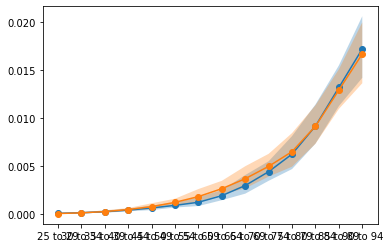

In [117]:
for sex in tran_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = tran_rate_sum_allyear.loc[(tran_rate_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_incd.loc[(gbd_incd.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Incidence Rate: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'Artifact 95%']) 

#groups = gbd_incd.groupby('sex')
#for name, group in groups:
#    plt.plot(group['age_group_name'], group['val'], marker='o', label=name)
#    plt.fill_between(group['age_group_name'], group['upper'], group['lower'], alpha=.3)

#### All Cause DALYs

In [ ]:
#gbd_daly = go("cause", gbd_round_id=5, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=294, measure_id=2, metric_id=3, location_id=523, year_id=2017, sex_id=[1,2])

In [ ]:
gbd_daly['age'] = gbd_daly.age_group_name.str.replace(' ', '_')
gbd_daly.head()

In [109]:
daly = daly.groupby(['age', 'sex', 'year', 'input_draw']).daly.sum().reset_index()
daly_rate = pd.concat([daly, per_time2.ptvalue], axis=1)
daly_rate['daly_rate'] = daly_rate['daly'] / daly_rate['ptvalue']
daly_sum_allyear = (daly_rate
                .groupby(['age', 'sex'])
                .daly_rate.describe(percentiles=[.025, .975])
                .filter(['mean', '2.5%', '97.5%'])
                .reset_index())

daly_sum_allyear.head()

age     sex      mean      2.5%     97.5%
0  25_to_29  female  0.060271  0.031335  0.085417
1  25_to_29    male  0.045772  0.000000  0.165945
2  30_to_34  female  0.079380  0.049128  0.109706
3  30_to_34    male  0.046809  0.000000  0.172774
4  35_to_39  female  0.090625  0.059708  0.127663

In [107]:
for sex in daly_sum_allyear.sex.unique():
    plt.figure() 
    subdata = daly_sum_allyear.loc[(daly_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_daly.loc[(gbd_daly.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'All Cause DALYs: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'Artifact 95%']) 